In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # viz
import matplotlib.pyplot as plt # viz
from scipy import stats

In [2]:
year1_df = pd.read_csv('Year 2009-2010-Table 1.csv')
year2_df = pd.read_csv('Year 2010-2011-Table 2.csv')

In [3]:
print(year1_df.shape, year2_df.shape)

(525461, 8) (541910, 8)


In [4]:
year1_df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

    InvoiceDate  Price  Customer ID         Country  
0  12/1/09 7:45   6.95      13085.0  United Kingdom  
1  12/1/09 7:45   6.75      13085.0  United Kingdom  
2  12/1/09 7:45   6.75      13085.0  United Kingdom  
3  12/1/09 7:45   2.10      13085.0  United Kingdom  
4  12/1/09 7:45   1.25      13085.0  United Kingdom

In [5]:
allyears_df=pd.concat([year1_df,year2_df],axis=0)
allyears_df.shape

(1067371, 8)

In [6]:
def investigate_df(df):
    df.info()
    print("\nNulls in dataset:")
    print(df.isna().sum())
    print(df.describe())
    print("\nUnique values for each:")
    print(df.nunique())
print(investigate_df(allyears_df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB

Nulls in dataset:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+

In [7]:
## Display statistics about the allyears_df ##
import ydata_profiling
from ydata_profiling import ProfileReport
# Basic analysis reports
ProfileReport(allyears_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.0 🔰Pre-Processing + Feature Engineering

#### ---------------------------------------------------------------------------------------------------------

### Some observations:  1. The datatypes of columns do need to be changed since Stock codes, invoice numbers should not have any ordinality instead should be strings. 2. Duplicated data should be analyzed to see if they can be removed 3. Decription & Customer ID have missing data so a dealing method should be in place 4. The profiling shows negative values in order quantity so need to validate if that represenst cancelled orders only 5. Validate also for price if <=0

#### Step 1: converting dtypes of some columns + adding Total_price column

In [8]:
allyears_df['InvoiceDate']=pd.to_datetime(allyears_df['InvoiceDate'])
allyears_df['Customer ID']=allyears_df['Customer ID'].astype(object)
allyears_df['Total_Price']=allyears_df['Price']*allyears_df['Quantity'] #since price here is unit price
allyears_df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
Total_Price           float64
dtype: object

#### Step 2: Validating & removing duplicate rows (output is allyears_clean2_df)

In [9]:
all_years_dup_df=allyears_df.iloc[allyears_df[(allyears_df.duplicated()>=1)].index]
all_years_dup_df.head(20)

Invoice StockCode                         Description  Quantity  \
371  489517     21912            VINTAGE SNAKES & LADDERS         1   
383  489517     22130    PARTY CONE CHRISTMAS DECORATION          6   
384  489517     22319   HAIRCLIPS FORTIES FABRIC ASSORTED        12   
385  489517     21913      VINTAGE SEASIDE JIGSAW PUZZLES         1   
386  489517     21821    GLITTER STAR GARLAND WITH BELLS          1   
390  489517    84951A     S/4 PISTACHIO LOVEBIRD COASTERS         1   
391  489517     21491     SET OF THREE VINTAGE GIFT WRAPS         1   
394  489517     21912            VINTAGE SNAKES & LADDERS         1   
657  489529     22028        PENNY FARTHING BIRTHDAY CARD        12   
658  489529     22036              DINOSAUR BIRTHDAY CARD        12   
669  489529     48129                    DOOR MAT TOPIARY         1   
723  489533     22073              RETRO SPOT STORAGE JAR         1   
725  489533     84946     ANTIQUE SILVER TEA GLASS ETCHED         6   
745  489536     21809    CHRISTMAS HANGING TREE WITH BELL         1   
799  489536     22142        CHRISTMAS CRAFT WHITE FAIRY          1   
808  489536    17164D    ASS COL SMALL SAND FROG P'WEIGHT         1   
809  489536     22353  LUNCHBOX WITH CUTLERY FAIRY CAKES          1   
810  489536     21791  VINTAGE HEADS AND TAILS CARD GAME          2   
817  489536     22142        CHRISTMAS CRAFT WHITE FAIRY          1   
820  489536     21650      ASSORTED TUTTI FRUTTI BRACELET         1   

            InvoiceDate  Price Customer ID         Country  Total_Price  
371 2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
383 2009-12-01 11:34:00   0.85     16329.0  United Kingdom         5.10  
384 2009-12-01 11:34:00   0.65     16329.0  United Kingdom         7.80  
385 2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
386 2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
390 2009-12-01 11:34:00   2.55     16329.0  United Kingdom         2.55  
391 2009-12-01 11:34:00   1.95     16329.0  United Kingdom         1.95  
394 2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
657 2009-12-01 11:51:00   0.42     17984.0  United Kingdom         5.04  
658 2009-12-01 11:51:00   0.42     17984.0  United Kingdom         5.04  
669 2009-12-01 11:51:00   6.75     17984.0  United Kingdom         6.75  
723 2009-12-01 12:02:00   3.75     16011.0  United Kingdom         3.75  
725 2009-12-01 12:02:00   1.25     16011.0  United Kingdom         7.50  
745 2009-12-01 12:13:00   1.25     16393.0  United Kingdom         1.25  
799 2009-12-01 12:13:00   1.45     16393.0  United Kingdom         1.45  
808 2009-12-01 12:13:00   0.42     16393.0  United Kingdom         0.42  
809 2009-12-01 12:13:00   2.55     16393.0  United Kingdom         2.55  
810 2009-12-01 12:13:00   1.25     16393.0  United Kingdom         2.50  
817 2009-12-01 12:13:00   1.45     16393.0  United Kingdom         1.45  
820 2009-12-01 12:13:00   0.65     16393.0  United Kingdom         0.65

In [10]:
#checking if these duplicate transactions were cancelled out with a -ve transaction with same stock code for same customer
allyears_df[(allyears_df['Customer ID']==16329) & (allyears_df['StockCode']=='21912')]
# Thus these are true duplicates & should be removed

Invoice StockCode               Description  Quantity  \
363     489517     21912  VINTAGE SNAKES & LADDERS         1   
371     489517     21912  VINTAGE SNAKES & LADDERS         1   
394     489517     21912  VINTAGE SNAKES & LADDERS         1   
350973  523539     21912  VINTAGE SNAKES & LADDERS         1   

               InvoiceDate  Price Customer ID         Country  Total_Price  
363    2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
371    2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
394    2009-12-01 11:34:00   3.75     16329.0  United Kingdom         3.75  
350973 2010-09-22 14:05:00   3.75     16329.0  United Kingdom         3.75

In [11]:
all_years_dup_df.shape

(34335, 9)

In [12]:
### since it is not very clear from above if they are indeed duplicates, lets see the group by results
all_years_dup_df.groupby(['Invoice','StockCode','Quantity','InvoiceDate','Price','Customer ID','Country'])[['Description']].count()

Description
Invoice StockCode Quantity InvoiceDate         Price Customer ID Country                    
489434  21232      24      2009-12-01 07:45:00 1.25  13085.0     United Kingdom            1
        21523      10      2009-12-01 07:45:00 5.95  13085.0     United Kingdom            1
        21871      24      2009-12-01 07:45:00 1.25  13085.0     United Kingdom            1
        22041      48      2009-12-01 07:45:00 2.10  13085.0     United Kingdom            1
        22064      24      2009-12-01 07:45:00 1.65  13085.0     United Kingdom            1
...                                                                                      ...
C536383 35004C    -1       2010-12-01 09:49:00 4.65  15311.0     United Kingdom            1
C536818 84947     -1       2010-12-02 17:09:00 1.25  16995.0     United Kingdom            1
C536822 22847     -2       2010-12-02 17:19:00 16.95 14625.0     United Kingdom            1
C537132 22761     -2       2010-12-05 12:29:00 21.95 15221.0     United Kingdom            1
        71279     -2       2010-12-05 12:29:00 2.95  15221.0     United Kingdom            1

[26361 rows x 1 columns]

In [13]:
#Safe to say that the same customer cannot have two same orders at the same timestamp & hence these can be removed
allyears_clean2_df =allyears_df.drop_duplicates(keep='last') ##34335 rows are dropped
allyears_clean2_df.shape
#allyears_clean2_df.isna().sum()

(1033036, 9)

#### Step 3: Validating & removing missing data (output is allyears_clean3_df)

In [14]:
 # to see if those with nas in Decription have customer Ids;
allyears_clean2_df[allyears_clean2_df['Description'].isna()].groupby(['Description','Customer ID'])[['Invoice']].count()

Empty DataFrame
Columns: [Invoice]
Index: []

In [15]:
# seems like those with Nas in Description also have NA in Customer ID so these should be removed
allyears_clean3_df=allyears_clean2_df.dropna()
allyears_clean3_df.shape #235151 rows dropped

(797885, 9)

In [16]:
## Just a sanity check that if NAs in Customer ID is dropped, NAs in description is also removed i.e. no rows with Nas in Description but value in Customer ID
allyears_clean2_df.dropna(subset=['Customer ID']).isnull().sum()
#allyears_clean2_df.dropna(subset=['Customer ID']).isnull().shape

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_Price    0
dtype: int64

#### Step 4: Sanity check of quantity#, price, stock codes & invoice formats (output is allyears_clean4_df)

#### 4a. Cancellations : Checking for orders with C in Invoices or cancellations

In [17]:
cancellations=allyears_clean3_df[allyears_clean3_df['Invoice'].str.contains('C')]
cancellations

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price Customer ID         Country  Total_Price  
178    2009-12-01 10:33:00    2.95     16321.0       Australia       -35.40  
179    2009-12-01 10:33:00    1.65     16321.0       Australia        -9.90  
180    2009-12-01 10:33:00    4.25     16321.0       Australia       -17.00  
181    2009-12-01 10:33:00    2.10     16321.0       Australia       -12.60  
182    2009-12-01 10:33:00    2.95     16321.0       Australia       -35.40  
...                    ...     ...         ...             ...          ...  
540449 2011-12-09 09:57:00    0.83     14397.0  United Kingdom        -9.13  
541541 2011-12-09 10:28:00  224.69     15498.0  United Kingdom      -224.69  
541715 2011-12-09 11:57:00   10.95     15311.0  United Kingdom       -54.75  
541716 2011-12-09 11:58:00    1.25     17315.0  United Kingdom        -1.25  
541717 2011-12-09 11:58:00    1.25     17315.0  United Kingdom        -6.25  

[18390 rows x 9 columns]

In [18]:
cancellations[cancellations['Quantity']>=0]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Total_Price]
Index: []

In [19]:
## ❇️ Top Items being cancelled most
cancellations.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(20)

StockCode  Description                       
M          Manual                                397
22423      REGENCY CAKESTAND 3 TIER              341
22138      BAKING SET 9 PIECE RETROSPOT          208
21232      STRAWBERRY CERAMIC TRINKET BOX        181
POST       POSTAGE                               180
D          Discount                              165
85123A     WHITE HANGING HEART T-LIGHT HOLDER    133
79323W     WHITE CHERRY LIGHTS                   119
21843      RED RETROSPOT CAKE STAND              106
79323P     PINK CHERRY LIGHTS                     86
22960      JAM MAKING SET WITH JARS               86
82483      WOOD 2 DRAWER CABINET WHITE FINISH     85
21231      SWEETHEART CERAMIC TRINKET BOX         73
85099B     JUMBO BAG RED RETROSPOT                72
22720      SET OF 3 CAKE TINS PANTRY DESIGN       72
37449      CERAMIC CAKE STAND + HANGING CAKES     71
21527      RED RETROSPOT TRADITIONAL TEAPOT       69
21314      SMALL GLASS HEART TRINKET POT          68


####  Cancellations : Checking of there's a corresponding +ve entry here ; if there is then the cancellations should be included to make revenue 0

In [20]:
#allyears_clean3_df[allyears_clean3_df['Invoice']=='C489449']
allyears_clean3_df[allyears_clean3_df['Customer ID']==16321]
## this is an example when order was returned (transaction invoice is 489450 and C489449)

#allyears_clean3_df[(allyears_clean3_df['Customer ID']==17315) & (allyears_clean3_df['StockCode']=='84978')]
##this is example where mltiple quantities were purchased and one was returned; 

Invoice StockCode                         Description  Quantity  \
178     C489449     22087            PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A        CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895       POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                  POTTING SHED TWINE        -6   
182     C489449     22083          PAPER CHAIN KIT RETRO SPOT       -12   
183     C489449     21871                 SAVE THE PLANET MUG       -12   
184     C489449     84946     ANTIQUE SILVER TEA GLASS ETCHED       -12   
185     C489449    84970S   HANGING HEART ZINC T-LIGHT HOLDER       -24   
186     C489449     22090           PAPER BUNTING RETRO SPOTS       -12   
187      489450     22087            PAPER BUNTING WHITE LACE        12   
188      489450    85206A        CREAM FELT EASTER EGG BASKET         6   
189      489450     21895       POTTING SHED SOW 'N' GROW SET         4   
190      489450     21896                  POTTING SHED TWINE         6   
191      489450     22083          PAPER CHAIN KIT RETRO SPOT        12   
192      489450     21871                 SAVE THE PLANET MUG        12   
193      489450     84946     ANTIQUE SILVER TEA GLASS ETCHED        12   
194      489450    84970S   HANGING HEART ZINC T-LIGHT HOLDER        24   
195      489450     22090           PAPER BUNTING RETRO SPOTS        12   
135099   502275    85206A        CREAM FELT EASTER EGG BASKET        12   
135100   502275     22585           PACK OF 6 BIRDY GIFT TAGS        12   
64609    541657     22087            PAPER BUNTING WHITE LACE         6   
64610    541657    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
64611    541657     21056               DOCTOR'S BAG SOFT TOY         3   
64612    541657     22960            JAM MAKING SET WITH JARS         6   
84270    543372     22087            PAPER BUNTING WHITE LACE        18   
84271    543372     22325              MOBILE VINTAGE HEARTS          3   
84299   C543375     22325              MOBILE VINTAGE HEARTS         -3   
84300   C543375     22087            PAPER BUNTING WHITE LACE       -18   
84301    543376     22325              MOBILE VINTAGE HEARTS          3   
84302    543376     22087            PAPER BUNTING WHITE LACE        18   
364931   568687     22090             PAPER BUNTING RETROSPOT        12   
364932   568687     21198        WHITE HEART CONFETTI IN TUBE        24   
365078  C568694     22090             PAPER BUNTING RETROSPOT       -12   
365079  C568694     21198        WHITE HEART CONFETTI IN TUBE       -24   
365080   568695     22090             PAPER BUNTING RETROSPOT        12   
365081   568695     21198        WHITE HEART CONFETTI IN TUBE        24   

               InvoiceDate  Price Customer ID    Country  Total_Price  
178    2009-12-01 10:33:00   2.95     16321.0  Australia       -35.40  
179    2009-12-01 10:33:00   1.65     16321.0  Australia        -9.90  
180    2009-12-01 10:33:00   4.25     16321.0  Australia       -17.00  
181    2009-12-01 10:33:00   2.10     16321.0  Australia       -12.60  
182    2009-12-01 10:33:00   2.95     16321.0  Australia       -35.40  
183    2009-12-01 10:33:00   1.25     16321.0  Australia       -15.00  
184    2009-12-01 10:33:00   1.25     16321.0  Australia       -15.00  
185    2009-12-01 10:33:00   0.85     16321.0  Australia       -20.40  
186    2009-12-01 10:33:00   2.95     16321.0  Australia       -35.40  
187    2009-12-01 10:36:00   2.95     16321.0  Australia        35.40  
188    2009-12-01 10:36:00   1.65     16321.0  Australia         9.90  
189    2009-12-01 10:36:00   4.25     16321.0  Australia        17.00  
190    2009-12-01 10:36:00   2.10     16321.0  Australia        12.60  
191    2009-12-01 10:36:00   2.95     16321.0  Australia        35.40  
192    2009-12-01 10:36:00   1.25     16321.0  Australia        15.00  
193    2009-12-01 10:36:00   1.25     16321.0  Australia        15.00  
194    2

#### This shows that since there is no way to map the invoices with cancellation invoices, it's better to leave the cancellations in dataset since at customer level it will determine the spend

#### 4b.Checking for orders with price as 0 or -ve

In [21]:
### where price is 0 or negative; 70 rows with 0 as price
allyears_clean3_df[allyears_clean3_df['Price']<=0]

Invoice StockCode                     Description  Quantity  \
4674    489825     22076              6 RIBBONS EMPIRE          12   
6781    489998     48185             DOOR MAT FAIRY CAKE         2   
16107   490727         M                          Manual         1   
18738   490961     22065  CHRISTMAS PUDDING TRINKET POT          1   
18739   490961     22142    CHRISTMAS CRAFT WHITE FAIRY         12   
...        ...       ...                             ...       ...   
479079  577129     22464     HANGING METAL HEART LANTERN         4   
479553  577168         M                          Manual         1   
480649  577314     23407  SET OF 2 TRAYS HOME SWEET HOME         2   
485985  577696         M                          Manual         1   
502122  578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  Price Customer ID         Country  Total_Price  
4674   2009-12-02 13:34:00    0.0     16126.0  United Kingdom          0.0  
6781   2009-12-03 11:19:00    0.0     15658.0  United Kingdom          0.0  
16107  2009-12-07 16:38:00    0.0     17231.0  United Kingdom          0.0  
18738  2009-12-08 15:25:00    0.0     14108.0  United Kingdom          0.0  
18739  2009-12-08 15:25:00    0.0     14108.0  United Kingdom          0.0  
...                    ...    ...         ...             ...          ...  
479079 2011-11-17 19:52:00    0.0     15602.0  United Kingdom          0.0  
479553 2011-11-18 10:42:00    0.0     12603.0         Germany          0.0  
480649 2011-11-18 13:23:00    0.0     12444.0          Norway          0.0  
485985 2011-11-21 11:57:00    0.0     16406.0  United Kingdom          0.0  
502122 2011-11-25 15:57:00    0.0     13256.0  United Kingdom          0.0  

[70 rows x 9 columns]

In [22]:
price0_df=allyears_clean3_df[allyears_clean3_df['Price']<=0]
#price0_df.head()
price0_df[price0_df['Quantity']<=0]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, Total_Price]
Index: []

In [23]:
#allyears_clean3_df[allyears_clean3_df['Invoice']=='489825']
#allyears_clean3_df[(allyears_clean3_df['Customer ID']==16126) & (allyears_clean3_df['StockCode']=='22076') ]

#### Observation : there are 70 rows with priice as 0 , some of them have stockcode manually entered (M) but quantity >=1 so its not clear why the price should be 0 for these items...
#### On checking one example these seem to b e a part of normal transactions and since revenue is effectively 0 they don't add to expenditure (as they could be some coupon discounts) but they still count as products purchased so they shpuld be included in dataset

In [24]:
price0_df['StockCode'].unique()
# Here we see some ENtries like M, 46000M, 84535B, PADS, TEST & invoices don't cpontain C. However none indicates a clear reason the price should be 0

array(['22076', '48185', 'M', '22065', '22142', '85042', '21143', '79320',
       '22355', '21533', 'TEST001', '21662', '22459', '22458', '22376',
       '21765', '20914', '22423', '22690', '22472', '22202', '46000M',
       '22218', '22630', '22121', '21843', '22624', '22846', '22845',
       '22841', '22580', '22090', '22553', '22168', '84535B', '22062',
       '22055', '22162', '22636', '47566', '22619', '22167', '22960',
       '23157', '23270', '23268', '22955', '21786', 'PADS', '22778',
       '21208', '23234', '22385', '22625', '22899', '23480', '22437',
       '22089', '22464', '23407', '84826'], dtype=object)

#### 4c. Checking for orders with quantity as 0 or -ve
#### Note : This has same results as 4a & validates that rows with C/ cancellations in invoices have -ve quantities only & all rows with -ve quantities have C attached to invoice code

In [25]:
### where quantity is 0 or negative;
quantity_negative_df=allyears_clean3_df[allyears_clean3_df['Quantity']<=0]
quantity_negative_df
## this is same as 4a . where invoices contain C

Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
540449  C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541  C581499         M                            Manual        -1   
541715  C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716  C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717  C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate   Price Customer ID         Country  Total_Price  
178    2009-12-01 10:33:00    2.95     16321.0       Australia       -35.40  
179    2009-12-01 10:33:00    1.65     16321.0       Australia        -9.90  
180    2009-12-01 10:33:00    4.25     16321.0       Australia       -17.00  
181    2009-12-01 10:33:00    2.10     16321.0       Australia       -12.60  
182    2009-12-01 10:33:00    2.95     16321.0       Australia       -35.40  
...                    ...     ...         ...             ...          ...  
540449 2011-12-09 09:57:00    0.83     14397.0  United Kingdom        -9.13  
541541 2011-12-09 10:28:00  224.69     15498.0  United Kingdom      -224.69  
541715 2011-12-09 11:57:00   10.95     15311.0  United Kingdom       -54.75  
541716 2011-12-09 11:58:00    1.25     17315.0  United Kingdom        -1.25  
541717 2011-12-09 11:58:00    1.25     17315.0  United Kingdom        -6.25  

[18390 rows x 9 columns]

In [26]:
#quantity_negative_df[quantity_negative_df['Invoice'].str.contains('C')] ## already validated that all that have -ve contain C & all that contain C are -ve

#### Observation :It may not be a good idea to remove these 18390 + 70 entries since cancellations & discounts contribute to customer behavior & can impact RFM of customer

In [27]:
# allyears_clean4_df=allyears_clean3_df[allyears_clean3_df['Quantity']>0] #779495
# allyears_clean4_df=allyears_clean4_df[allyears_clean4_df['Price']>0] #779425 after 70 rows more deleted
# allyears_clean4_df.shape

#### Step 5: Sanity check of Country column (output is allyears_clean5_df)

In [28]:
allyears_clean3_df.groupby(['Country'])[['Invoice']].count().sort_values('Invoice',ascending=False).head(20)

Invoice
Country                 
United Kingdom    716115
Germany            17339
EIRE               16014
France             13897
Netherlands         5137
Spain               3754
Belgium             3110
Switzerland         3058
Portugal            2414
Australia           1890
Channel Islands     1646
Italy               1507
Sweden              1343
Norway              1308
Cyprus              1157
Finland             1049
Austria              938
Denmark              797
Greece               663
Japan                565

<AxesSubplot:xlabel='Country'>

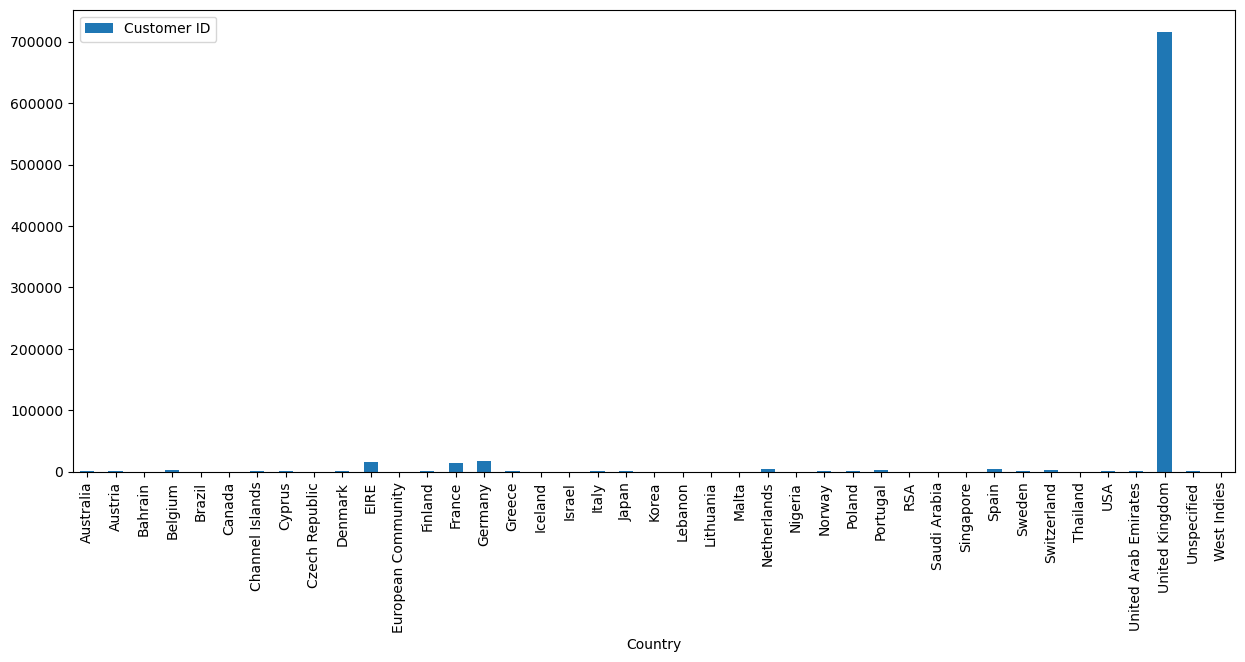

In [29]:
#allyears_clean3_df.groupby(['Country'])[['Invoice']].count().plot(kind='bar')
#allyears_clean3_df.groupby(['Country'])[['Price']].sum().plot(kind='bar') # same for quantity
allyears_clean3_df.groupby(['Country'])[['Customer ID']].count().plot(kind='bar',figsize=(15,6))
#allyears_clean3_df.groupby(['Country'])[['Total_Price']].sum().plot(kind='bar')


### Consider only UK Transactions for removing one variability in clustering?
#### Since the rest of the countries make up about approx 500k revenue out of total 3M revenue we decide to retail all data

#### Step 6 : Detect Outliers

/Users/royscrolls/opt/anaconda3/envs/getting_started_snowpark_python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

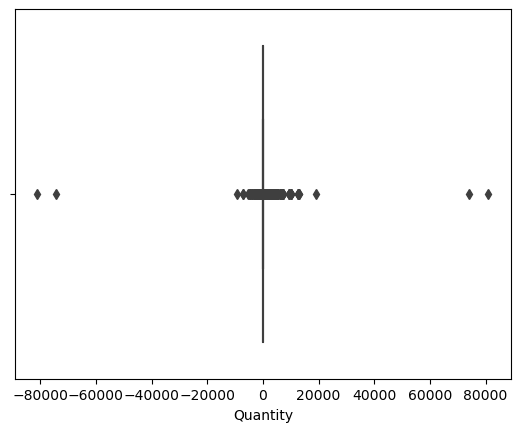

In [31]:
#sns.boxplot( allyears_clean4_df['Price'])
sns.boxplot( allyears_clean3_df['Quantity'])
## Explicit outliers in Quantity

In [32]:
allyears_clean3_df[allyears_clean3_df['Quantity']>60000]
#Let's look at these customer transactions history (12346,16446 )
#allyears_clean3_df[allyears_clean3_df['Customer ID'] ==12346] 
# Going by the historical transactions, these 2 outlier rows also have corresponding cancellation rows so when we create derived metrics at customer level these should 0 out

Invoice StockCode                     Description  Quantity  \
61619   541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
540421  581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  Price Customer ID         Country  Total_Price  
61619  2011-01-18 10:01:00   1.04     12346.0  United Kingdom      77183.6  
540421 2011-12-09 09:15:00   2.08     16446.0  United Kingdom     168469.6

In [33]:
#Not needed - ignore
#allyears_clean4_df.drop(allyears_clean4_df[allyears_clean4_df.Quantity>60000].index, inplace=True)

In [34]:
#Checking for high unit prices

allyears_clean3_df[allyears_clean3_df['Price']>=6000]
#Let's look at these customer transactions history (15760,17949,12918,14063,16029,15413,15098 )
#allyears_clean3_df[allyears_clean3_df['Customer ID'] ==15413] 
#Note : 17949,16029 and 14063 are repeat purchasers so better to leave them as is

Invoice StockCode Description  Quantity         InvoiceDate     Price  \
74356    496115         M      Manual         1 2010-01-29 11:04:00   8985.60   
74357   C496116         M      Manual        -1 2010-01-29 11:05:00   8985.60   
129902  C501751         M      Manual        -1 2010-03-19 11:30:00   6958.17   
129903   501766         M      Manual         1 2010-03-19 11:35:00   6958.17   
129987   501768         M      Manual         1 2010-03-19 11:45:00   6958.17   
129988  C501769         M      Manual        -1 2010-03-19 11:49:00   6958.17   
135012  C502262         M      Manual        -1 2010-03-23 15:20:00  10953.50   
135013   502263         M      Manual         1 2010-03-23 15:22:00  10953.50   
135014  C502264         M      Manual        -1 2010-03-23 15:24:00  10953.50   
241824  C512770         M      Manual        -1 2010-06-17 16:52:00  25111.09   
342135  C522793         M      Manual        -1 2010-09-16 14:53:00  10468.80   
358639   524159         M      Manual         1 2010-09-27 16:12:00  10468.80   
372833  C525398         M      Manual        -1 2010-10-05 11:47:00  10468.80   
374183  C525470         M      Manual        -1 2010-10-05 15:12:00   7044.79   
173277  C551685      POST     POSTAGE        -1 2011-05-03 12:51:00   8142.75   
173382   551697      POST     POSTAGE         1 2011-05-03 13:46:00   8142.75   
173391  C551699         M      Manual        -1 2011-05-03 14:12:00   6930.00   
222681  C556445         M      Manual        -1 2011-06-10 15:31:00  38970.00   

       Customer ID         Country  Total_Price  
74356      17949.0  United Kingdom      8985.60  
74357      17949.0  United Kingdom     -8985.60  
129902     15760.0          Norway     -6958.17  
129903     15760.0          Norway      6958.17  
129987     15760.0          Norway      6958.17  
129988     15760.0          Norway     -6958.17  
135012     12918.0  United Kingdom    -10953.50  
135013     12918.0  United Kingdom     10953.50  
135014     12918.0  United Kingdom    -10953.50  
241824     17399.0  United Kingdom    -25111.09  
342135     14063.0  United Kingdom    -10468.80  
358639     14063.0  United Kingdom     10468.80  
372833     14063.0  United Kingdom    -10468.80  
374183     15413.0  United Kingdom     -7044.79  
173277     16029.0  United Kingdom     -8142.75  
173382     16029.0  United Kingdom      8142.75  
173391     16029.0  United Kingdom     -6930.00  
222681     15098.0  United Kingdom    -38970.00

In [35]:
print (allyears_clean3_df['InvoiceDate'].max(),allyears_clean3_df['InvoiceDate'].min())

2011-12-09 12:50:00 2009-12-01 07:45:00


### Note : Earliest Transaction is 12/1/2009 and Latest is 12/09/2011

### -------------------------------------------------------------------------------------------------

### 2.0 🔰Visualizations (creating a time series df) 
#### picking from allyears_clean3_df since we chose to not exclude anything in Step 4, 5 & 6)

In [36]:
#create a date column that will be our basis / index for TS data
allyears_cleaned=allyears_clean3_df.copy()
allyears_cleaned['InvoiceDate_only']=allyears_cleaned['InvoiceDate'].dt.normalize() ##normalize is to keep the dtype format but create a new date column
allyears_cleaned.dtypes

Invoice                     object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
Price                      float64
Customer ID                 object
Country                     object
Total_Price                float64
InvoiceDate_only    datetime64[ns]
dtype: object

### 2.1 Creating a Time Series with aggregated data for retail store

In [37]:
#time_series_all=allyears_cleaned.groupby(['InvoiceDate_only'])[['Price']].sum()
time_series_all=allyears_cleaned.groupby(['InvoiceDate_only']).agg(sum_price=('Total_Price','sum')) #date level sum
#time_series_all.plot(kind='line')
time_series_all.head(5)

sum_price
InvoiceDate_only           
2009-12-01         42554.40
2009-12-02         52398.26
2009-12-03         61468.76
2009-12-04         33536.26
2009-12-05          9803.05

(array([14610., 14700., 14791., 14883., 14975., 15065., 15156., 15248.,
        15340.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

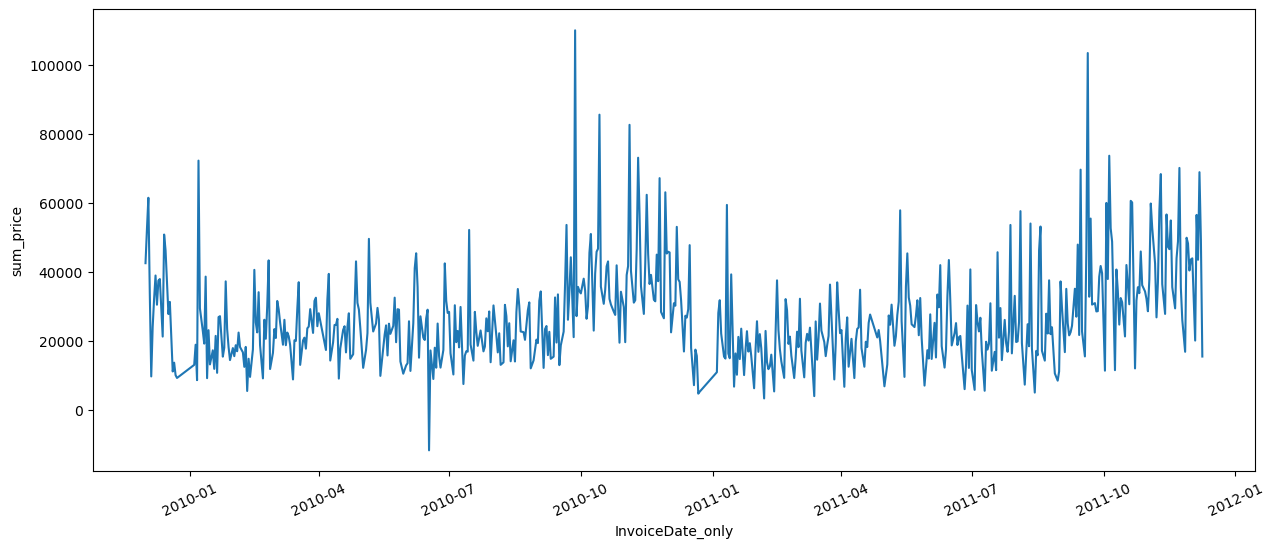

In [38]:
# create the time series plot 
plt.figure(figsize=(15,6))
sns.lineplot(x = "InvoiceDate_only", y = "sum_price", 
             data = time_series_all) 
  
plt.xticks(rotation = 25)

In [39]:
## Augmenting this timeseries with additional features
time_series_all['InvoiceDate_only'] = time_series_all.index
time_series_all['Year'] = time_series_all['InvoiceDate_only'].dt.year
time_series_all['Month'] = time_series_all['InvoiceDate_only'].dt.month
time_series_all.head()

sum_price InvoiceDate_only  Year  Month
InvoiceDate_only                                         
2009-12-01         42554.40       2009-12-01  2009     12
2009-12-02         52398.26       2009-12-02  2009     12
2009-12-03         61468.76       2009-12-03  2009     12
2009-12-04         33536.26       2009-12-04  2009     12
2009-12-05          9803.05       2009-12-05  2009     12

### 2.2 Creating Heatmap to see most popular months

Text(50.722222222222214, 0.5, 'Months')

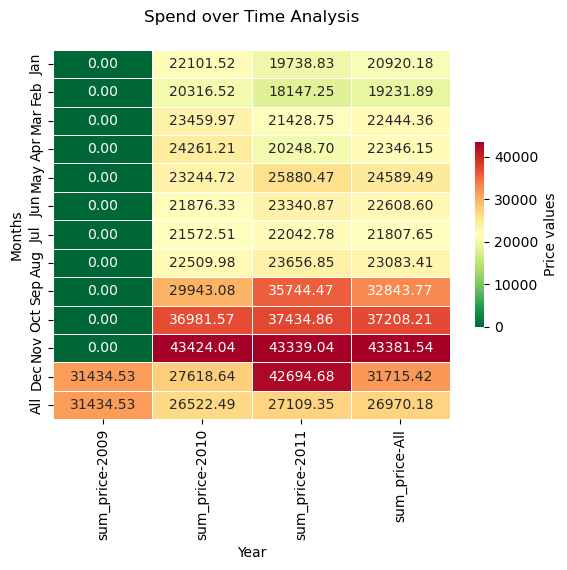

In [40]:
# Creating a Pivot Table 
pivot_df = pd.pivot_table(time_series_all, values=["sum_price"],
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)

# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec', 'All']]
 
# Indexing using Month Names
pivot_df = pivot_df.set_index(mon_name)
 
# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
ax = sns.heatmap(pivot_df, cmap='RdYlGn_r', 
                 robust=True, fmt='.2f', 
                 annot=True, linewidths=.6,
                 annot_kws={'size':10}, 
                 cbar_kws={'shrink':.5,
                           'label':'Price values'})                       
 
# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Spend over Time Analysis', pad=20)
plt.xlabel('Year')
plt.ylabel('Months')

### 2.3 Augmenting the cleaned dataset with date features (output=all_years_augmented)

In [41]:
allyears_augmented=allyears_cleaned.copy()

In [42]:
allyears_augmented['Year']=allyears_augmented['InvoiceDate_only'].dt.year
allyears_augmented['Month']=allyears_augmented['InvoiceDate_only'].dt.month
allyears_augmented['Week']=allyears_augmented['InvoiceDate_only'].dt.isocalendar().week
allyears_augmented['Quarter']=allyears_augmented['InvoiceDate_only'].dt.quarter
allyears_augmented['Week_day_name']=allyears_augmented['InvoiceDate_only'].dt.day_name()
allyears_augmented['Month_name']=allyears_augmented['InvoiceDate_only'].dt.month_name()
allyears_augmented.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  Total_Price  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom         83.4   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         81.0   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         81.0   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom        100.8   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom         30.0   

  InvoiceDate_only  Year  Month  Week  Quarter Week_day_name Month_name  
0       2009-12-01  2009     12    49        4       Tuesday   December  
1       2009-12-01  2009     12    49        4       Tuesday   December  
2       2009-12-01  2009     12    49        4       Tuesday   December  
3       2009-12-01  2009     12    49        4       Tuesday   December  
4       2009-12-01  2009     12    49        4       Tuesday   December

### -------------------------------------------------------------------------------------------------------------

### 3.0 🔰 Going back to cleaned dataset (allyears_cleaned) for further analysis

In [43]:
allyears_cleaned.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  Total_Price  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom         83.4   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         81.0   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         81.0   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom        100.8   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom         30.0   

  InvoiceDate_only  
0       2009-12-01  
1       2009-12-01  
2       2009-12-01  
3       2009-12-01  
4       2009-12-01

In [44]:
print(investigate_df(allyears_cleaned))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           797885 non-null  object        
 1   StockCode         797885 non-null  object        
 2   Description       797885 non-null  object        
 3   Quantity          797885 non-null  int64         
 4   InvoiceDate       797885 non-null  datetime64[ns]
 5   Price             797885 non-null  float64       
 6   Customer ID       797885 non-null  object        
 7   Country           797885 non-null  object        
 8   Total_Price       797885 non-null  float64       
 9   InvoiceDate_only  797885 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 67.0+ MB

Nulls in dataset:
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price             

In [45]:
allyears_cleaned['Description'].unique

<bound method Series.unique of 0         15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                          PINK CHERRY LIGHTS
2                         WHITE CHERRY LIGHTS
3                RECORD FRAME 7" SINGLE SIZE 
4              STRAWBERRY CERAMIC TRINKET BOX
                         ...                 
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
541909                                POSTAGE
Name: Description, Length: 797885, dtype: object>

### 3.1🔰 Prepping data for Clustering

#### Reason : Kmeans/ Kmodes is not feasible unless we have data at a customer level; right now at a transaction level.
#### Ideally we want  customerID || Prod1 ||Prod2|| ......||Prod n|| No of products purchased (could be number or range) || repeat purchaser bool || Days since last purchase

In [46]:
# Solving second part first
allyears_prepped=allyears_cleaned.groupby(['Customer ID']).agg(unique_invoices=('Invoice','nunique'),unique_stockcode=('StockCode','nunique'),unique_transactiondates=('InvoiceDate_only','nunique'),min_transactiondate=('InvoiceDate_only','min'),max_transactiondate=('InvoiceDate_only','max'),total_spend=('Total_Price','sum'))
allyears_prepped.sort_values('total_spend',ascending=False).head(10)

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
18102.0                  153               384                       71   
14646.0                  164               964                       97   
14156.0                  202              1446                      148   
14911.0                  510              2557                      285   
17450.0                   61               148                       37   
13694.0                  164               902                       95   
17511.0                   85               678                       59   
12415.0                   33               498                       25   
16684.0                   65               186                       40   
15061.0                  138               131                       73   

            min_transactiondate max_transactiondate  total_spend  
Customer ID                                                       
18102.0              2009-12-01          2011-12-09    570380.61  
14646.0              2009-12-02          2011-12-08    523342.07  
14156.0              2009-12-01          2011-11-30    296063.44  
14911.0              2009-12-01          2011-12-08    265757.91  
17450.0              2010-09-27          2011-12-01    231390.55  
13694.0              2009-12-04          2011-12-06    190020.84  
17511.0              2009-12-02          2011-12-07    168491.62  
12415.0              2010-06-30          2011-11-15    143269.29  
16684.0              2009-12-07          2011-12-05    141502.25  
15061.0              2009-12-01          2011-12-06    124961.98

#### Observation : If max (transaction date)=min (transaction date) , they are one time customer while others are repeat; further we can calculate ( max-min) / distinct transaction dates to figure approx how frequently customer purchases; so strategically we can focus on repeat customers with high frequency & high monetary value 

In [47]:
allyears_prepped['days_between']=(allyears_prepped['max_transactiondate']-allyears_prepped['min_transactiondate']).dt.days
allyears_prepped.sort_values('unique_invoices',ascending=False).head(5)

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
14911.0                  510              2557                      285   
12748.0                  365              2287                      207   
17841.0                  289              2121                      194   
15311.0                  270               870                      202   
14606.0                  259              1270                      182   

            min_transactiondate max_transactiondate  total_spend  days_between  
Customer ID                                                                     
14911.0              2009-12-01          2011-12-08    265757.91           737  
12748.0              2009-12-04          2011-12-09     46933.33           735  
17841.0              2009-12-02          2011-12-08     67186.87           736  
15311.0              2009-12-01          2011-12-09    111739.36           738  
14606.0              2009-12-03          2011-12-08     29197.59           735

In [48]:
## Since Latest Transaction Date is 12/09/2011 we can calculate Days since last purchase from that date to see if customers are churning
allyears_prepped['days_since_lastpurchase']=pd.to_datetime("2011-12-10") - allyears_prepped['max_transactiondate']
allyears_prepped.drop(['min_transactiondate','max_transactiondate'],axis=1,inplace=True)
allyears_prepped.dtypes

unique_invoices                      int64
unique_stockcode                     int64
unique_transactiondates              int64
total_spend                        float64
days_between                         int64
days_since_lastpurchase    timedelta64[ns]
dtype: object

In [49]:
##. converting timedelta column into int
allyears_prepped['days_since_lastpurchase']=allyears_prepped['days_since_lastpurchase'].dt.days

In [50]:
#print(investigate_df(allyears_prepped))

In [51]:
allyears_prepped[allyears_prepped['total_spend']<0]
## these should be dropped since it could signify error in recording/ incomplete data

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
12346.0                   17                30                       11   
12382.0                    1                 1                        1   
12706.0                    1                 1                        1   
12896.0                    1                 1                        1   
12918.0                    3                 1                        1   
...                      ...               ...                      ...   
17661.0                    1                 1                        1   
17755.0                    1                10                        1   
17943.0                    1                 1                        1   
18023.0                    1                 1                        1   
18072.0                    2                20                        2   

              total_spend  days_between  days_since_lastpurchase  
Customer ID                                                       
12346.0     -5.174000e+01           400                      326  
12382.0     -1.838000e+01             0                      683  
12706.0     -9.189000e+01             0                      683  
12896.0     -2.975000e+01             0                      731  
12918.0     -1.095350e+04             0                      627  
...                   ...           ...                      ...  
17661.0     -5.400000e+01             0                      642  
17755.0     -7.223000e+01             0                      425  
17943.0     -1.650300e+02             0                      680  
18023.0     -3.248860e+03             0                      541  
18072.0     -5.329071e-15            30                      156  

[84 rows x 6 columns]

In [52]:
allyears_prepped.sort_values(['unique_invoices','days_since_lastpurchase'],ascending=False).tail(5)

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
15195.0                    1                 1                        1   
13298.0                    1                 2                        1   
13436.0                    1                12                        1   
15520.0                    1                18                        1   
12713.0                    1                38                        1   

             total_spend  days_between  days_since_lastpurchase  
Customer ID                                                      
15195.0          3861.00             0                        3  
13298.0           360.00             0                        2  
13436.0           196.89             0                        2  
15520.0           343.50             0                        2  
12713.0           848.55             0                        1

In [53]:
allyears_prepped[allyears_prepped['unique_invoices']==1].shape

(1461, 6)

#### This signifies that customers who made just one trasaction (that too in last few days) can rank up high on recency metric but their frequency is 1 i.e. they are recently acquired ones likely; there are 1461 single invoice customers  which is a significant number 

### the best way to deal with this variation is to assign have derived metrics for:
#### recency ---> 'days_since_lastpurchase'
#### frequency (how often in days is customer purchasing) ---> 'days_between'/ 'unique_transactiondates  #Note : this normalizes the frequency for each customer but this will yield 0 for single purchase customer which should be dealt with by putting a repeat customer tag/ column
#### monetary ---> 'total_spend'

### Once we have them, we should assign a 1- 4 score / rank based on quartiles
##### Will keep other columns like --> unique_invoices, unique_stockcode

/Users/royscrolls/opt/anaconda3/envs/getting_started_snowpark_python/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


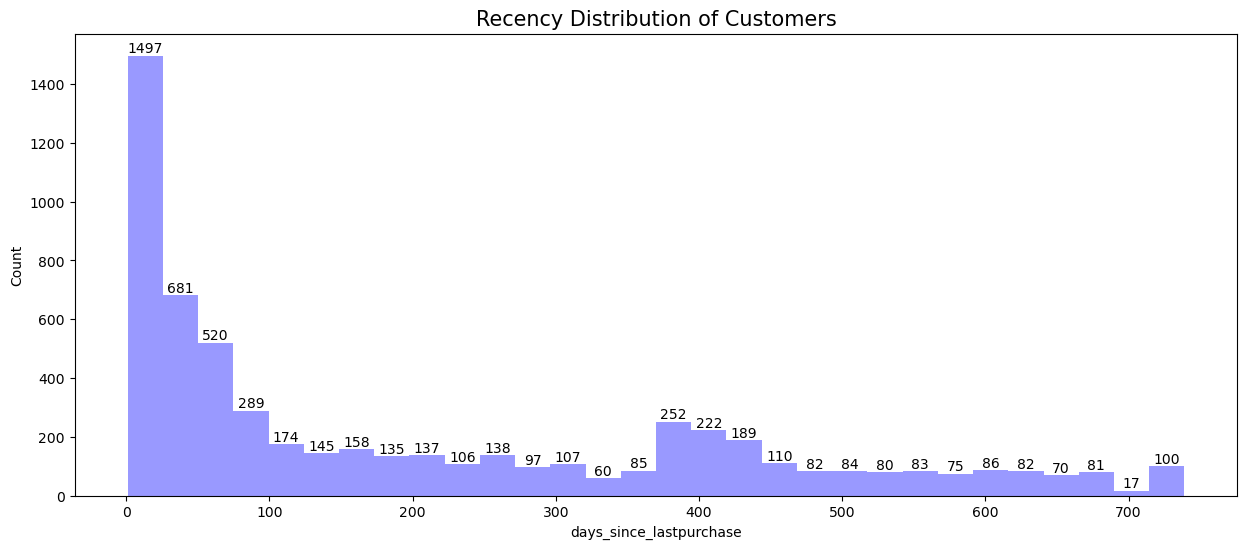

In [54]:
plt.subplots(figsize=(15, 6))
ax = sns.distplot(x=allyears_prepped['days_since_lastpurchase'], kde=False, bins=30,color='blue')
plt.title('Recency Distribution of Customers', fontsize = 15)
plt.xlabel('days_since_lastpurchase')
plt.ylabel('Count');
for i in ax.containers:
    ax.bar_label(i)

### Implementing approach of taking quartiles & assigning scores to get final modified dataset ; 

In [55]:
allyears_prepped_m=allyears_prepped.copy()
allyears_prepped_m.drop(allyears_prepped_m[allyears_prepped_m['total_spend'] <0].index, inplace=True) #84 customers dropped
allyears_prepped_m['frequency']=allyears_prepped_m['days_between']/allyears_prepped_m['unique_transactiondates']
allyears_prepped_m['repeat_customer']=np.where(allyears_prepped_m['unique_transactiondates']>=2, 1, 0)
allyears_prepped_m = allyears_prepped_m.rename(columns={'days_since_lastpurchase': 'recency', 'total_spend': 'monetary'})
print(allyears_prepped_m.shape,allyears_prepped.shape)

(5858, 8) (5942, 6)


In [56]:
#optional
# allyears_prepped_m.drop(['days_between','unique_transactiondates'],axis=1,inplace=True)
# allyears_prepped_m.head()

In [57]:
allyears_prepped_m.head()

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
12347.0                    8               126                        8   
12348.0                    5                25                        5   
12349.0                    5               139                        5   
12350.0                    1                17                        1   
12351.0                    1                21                        1   

             monetary  days_between  recency  frequency  repeat_customer  
Customer ID                                                               
12347.0       4921.53           402        3      50.25                1  
12348.0       2019.40           363       76      72.60                1  
12349.0       4404.54           717       19     143.40                1  
12350.0        334.40             0      311       0.00                0  
12351.0        300.93             0      376       0.00                0

In [58]:
print(investigate_df(allyears_prepped_m))

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5858 entries, 12347.0 to 18287.0
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unique_invoices          5858 non-null   int64  
 1   unique_stockcode         5858 non-null   int64  
 2   unique_transactiondates  5858 non-null   int64  
 3   monetary                 5858 non-null   float64
 4   days_between             5858 non-null   int64  
 5   recency                  5858 non-null   int64  
 6   frequency                5858 non-null   float64
 7   repeat_customer          5858 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 411.9 KB

Nulls in dataset:
unique_invoices            0
unique_stockcode           0
unique_transactiondates    0
monetary                   0
days_between               0
recency                    0
frequency                  0
repeat_customer            0
dtype: int64
       unique_invoices  uni

In [59]:
##adding scores
allyears_prepped_m2=allyears_prepped_m.copy()
allyears_prepped_m2['recency_score'] = pd.qcut(allyears_prepped_m2['recency'], q=4, labels=[1,2,3,4])
allyears_prepped_m2['frequency_score'] = pd.cut(allyears_prepped_m2['frequency'], bins=4, labels=[1,2,3,4])
allyears_prepped_m2['monetary_score'] = pd.qcut(allyears_prepped_m2['monetary'], q=4, labels=[4,3,2,1])
allyears_prepped_m2.head(10)

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
12347.0                    8               126                        8   
12348.0                    5                25                        5   
12349.0                    5               139                        5   
12350.0                    1                17                        1   
12351.0                    1                21                        1   
12352.0                   13                70                        9   
12353.0                    2                23                        2   
12354.0                    1                58                        1   
12355.0                    2                35                        2   
12356.0                    6               104                        6   

             monetary  days_between  recency   frequency  repeat_customer  \
Customer ID                                                                 
12347.0       4921.53           402        3   50.250000                1   
12348.0       2019.40           363       76   72.600000                1   
12349.0       4404.54           717       19  143.400000                1   
12350.0        334.40             0      311    0.000000                0   
12351.0        300.93             0      376    0.000000                0   
12352.0       1889.21           356       37   39.555556                1   
12353.0        406.76           204      205  102.000000                1   
12354.0       1079.40             0      233    0.000000                0   
12355.0        947.61           353      215  176.500000                1   
12356.0       6371.73           402       23   67.000000                1   

            recency_score frequency_score monetary_score  
Customer ID                                               
12347.0                 1               1              1  
12348.0                 2               1              2  
12349.0                 1               2              1  
12350.0                 3               1              3  
12351.0                 3               1              4  
12352.0                 2               1              2  
12353.0                 3               2              3  
12354.0                 3               1              2  
12355.0                 3               3              2  
12356.0                 1               1              1

In [60]:
cat_columns=['recency_score','frequency_score','monetary_score']
allyears_prepped_m2[cat_columns]=allyears_prepped_m2[cat_columns].astype(float).astype("Int64") #converts category to ints
allyears_prepped_m2['RFM_score'] =allyears_prepped_m2['recency_score'] + allyears_prepped_m2['frequency_score'] + allyears_prepped_m2['monetary_score']
allyears_prepped_m2.drop(['recency_score','frequency_score','monetary_score'],axis=1,inplace=True)
allyears_prepped_m2.head()
##Note : Ideal score is 3 

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
12347.0                    8               126                        8   
12348.0                    5                25                        5   
12349.0                    5               139                        5   
12350.0                    1                17                        1   
12351.0                    1                21                        1   

             monetary  days_between  recency  frequency  repeat_customer  \
Customer ID                                                                
12347.0       4921.53           402        3      50.25                1   
12348.0       2019.40           363       76      72.60                1   
12349.0       4404.54           717       19     143.40                1   
12350.0        334.40             0      311       0.00                0   
12351.0        300.93             0      376       0.00                0   

             RFM_score  
Customer ID             
12347.0              3  
12348.0              5  
12349.0              4  
12350.0              7  
12351.0              8

In [61]:
allyears_prepped_m2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5858 entries, 12347.0 to 18287.0
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unique_invoices          5858 non-null   int64  
 1   unique_stockcode         5858 non-null   int64  
 2   unique_transactiondates  5858 non-null   int64  
 3   monetary                 5858 non-null   float64
 4   days_between             5858 non-null   int64  
 5   recency                  5858 non-null   int64  
 6   frequency                5858 non-null   float64
 7   repeat_customer          5858 non-null   int64  
 8   RFM_score                5858 non-null   Int64  
dtypes: Int64(1), float64(2), int64(6)
memory usage: 463.4 KB


#### Let's visualize RFM without clusters

/var/folders/0t/56tw317j52n02zljvtt1yxg00000gn/T/ipykernel_50162/3954248586.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


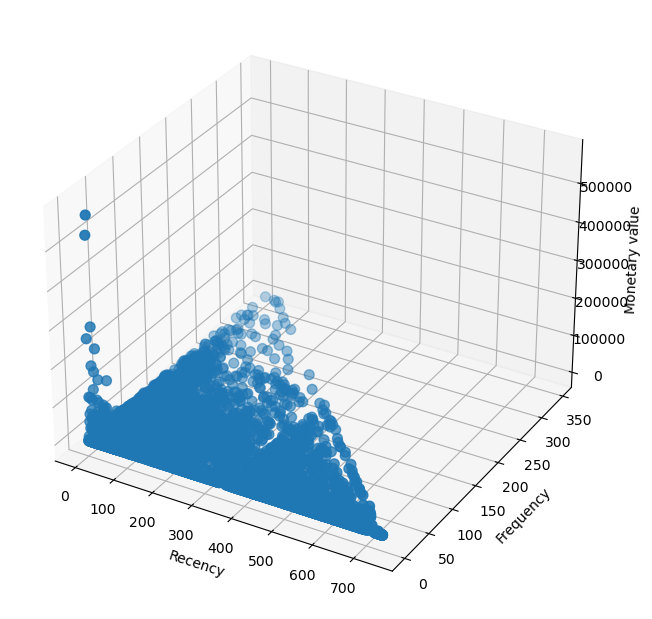

In [62]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] =(9,6)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
ax.scatter(allyears_prepped_m2["recency"], allyears_prepped_m2["frequency"], allyears_prepped_m2["monetary"], s=50);

### 4.0 🔰proceeding with KMeans Below

In [63]:
from sklearn import preprocessing
import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

In [64]:
#X_input=preprocessing.normalize(allyears_prepped_m2)

In [65]:
# normalized_allyears_prepped=allyears_prepped_m2.copy()
# normalized_allyears_prepped[‘recency_log’]=normalized_allyears_prepped[‘recency’].apply(math.log)
# normalized_allyears_prepped[‘frequency_log’]=normalized_allyears_prepped[‘frequency’].apply(math.log)
# normalized_allyears_prepped[‘monetary_log’]=normalized_allyears_prepped[‘monetary’].apply(math.log)
# features=[‘recency_log’] ##,‘frequency_log’,‘monetary_log’
# X=normalized_allyears_prepped[features].values
# scaler=preprocessing.StandardScaler()
# X_scaled=scaler.fit_transform(X)

In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_input = scaler.fit_transform(allyears_prepped_m2)
#unscaled_X = scaler.inverse_transform(X_input)

In [67]:
## Elbow Method
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
 }
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_input)
    sse.append(kmeans.inertia_) ##gives  error

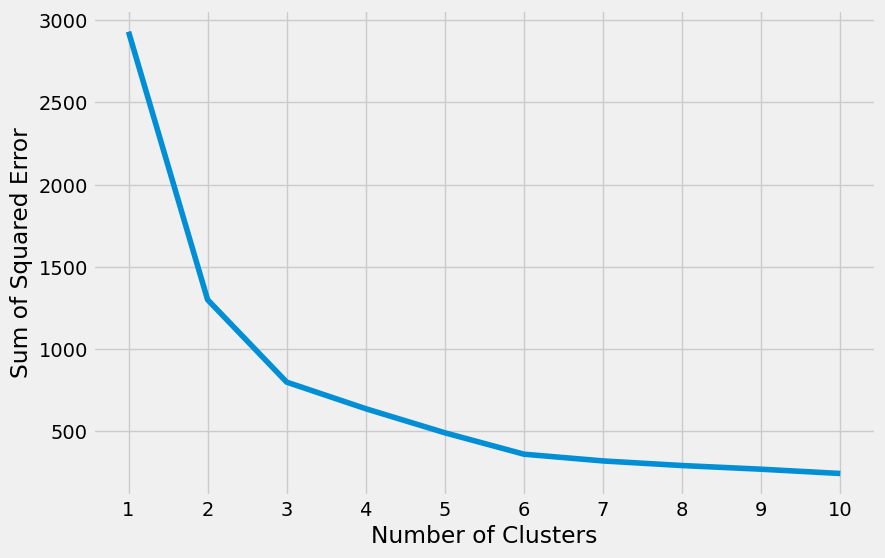

In [68]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

In [69]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

### By Method above : 3 or 4 clusters Max

In [70]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_input)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [71]:
kmeans.cluster_centers_

array([[ 5.68320948e-03,  1.99056119e-02,  8.94910526e-03,
         1.75681221e-03,  2.32724559e-01,  3.43206604e-01,
         1.58462809e-01,  1.00000000e+00,  5.53278123e-01],
       [ 2.78578658e-02,  5.79299026e-02,  4.15431986e-02,
         1.04883892e-02,  7.50898650e-01,  6.35548282e-02,
         2.14896744e-01,  1.00000000e+00,  2.27767471e-01],
       [ 9.77735138e-05,  8.15146625e-03,  2.08166817e-17,
         6.40202619e-04,  1.11022302e-16,  1.71857022e-01,
        -8.32667268e-17,  7.77156117e-16,  5.58098200e-01],
       [ 1.36465772e-04,  7.64011882e-03,  2.08166817e-17,
         5.33943922e-04, -5.55111512e-16,  7.16844360e-01,
        -8.32667268e-17, -1.11022302e-16,  8.04961506e-01]])

In [72]:
kmeans.labels_[:5]

array([1, 1, 1, 2, 3], dtype=int32)

In [73]:
X_input_df=pd.DataFrame(X_input, columns =['unique_invoices','unique_stockcode','unique_transactiondates','monetary','days_between','recency','frequency','repeat_customer','RFM_score'])

In [74]:
X_input_df['kmeans_cluster']=kmeans.labels_
X_input_df.head()

unique_invoices  unique_stockcode  unique_transactiondates  monetary  \
0         0.013752          0.048905                 0.024648  0.008629   
1         0.007859          0.009390                 0.014085  0.003540   
2         0.007859          0.053991                 0.014085  0.007722   
3         0.000000          0.006260                 0.000000  0.000586   
4         0.000000          0.007825                 0.000000  0.000528   

   days_between   recency  frequency  repeat_customer  RFM_score  \
0      0.544715  0.002710   0.145441              1.0   0.000000   
1      0.491870  0.101626   0.210130              1.0   0.285714   
2      0.971545  0.024390   0.415051              1.0   0.142857   
3      0.000000  0.420054   0.000000              0.0   0.571429   
4      0.000000  0.508130   0.000000              0.0   0.714286   

   kmeans_cluster  
0               1  
1               1  
2               1  
3               2  
4               3

#### Output Dataframe with Clusters

In [75]:
##Alternately
allyears_prepped_withcluster=allyears_prepped_m2.copy()
allyears_prepped_withcluster['cluster']=kmeans.labels_
allyears_prepped_withcluster.head()

unique_invoices  unique_stockcode  unique_transactiondates  \
Customer ID                                                               
12347.0                    8               126                        8   
12348.0                    5                25                        5   
12349.0                    5               139                        5   
12350.0                    1                17                        1   
12351.0                    1                21                        1   

             monetary  days_between  recency  frequency  repeat_customer  \
Customer ID                                                                
12347.0       4921.53           402        3      50.25                1   
12348.0       2019.40           363       76      72.60                1   
12349.0       4404.54           717       19     143.40                1   
12350.0        334.40             0      311       0.00                0   
12351.0        300.93             0      376       0.00                0   

             RFM_score  cluster  
Customer ID                      
12347.0              3        1  
12348.0              5        1  
12349.0              4        1  
12350.0              7        2  
12351.0              8        3

In [76]:
print(allyears_prepped_withcluster.groupby('cluster').size())

cluster
0    2071
1    2309
2     642
3     836
dtype: int64


#### Visualizing With Clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


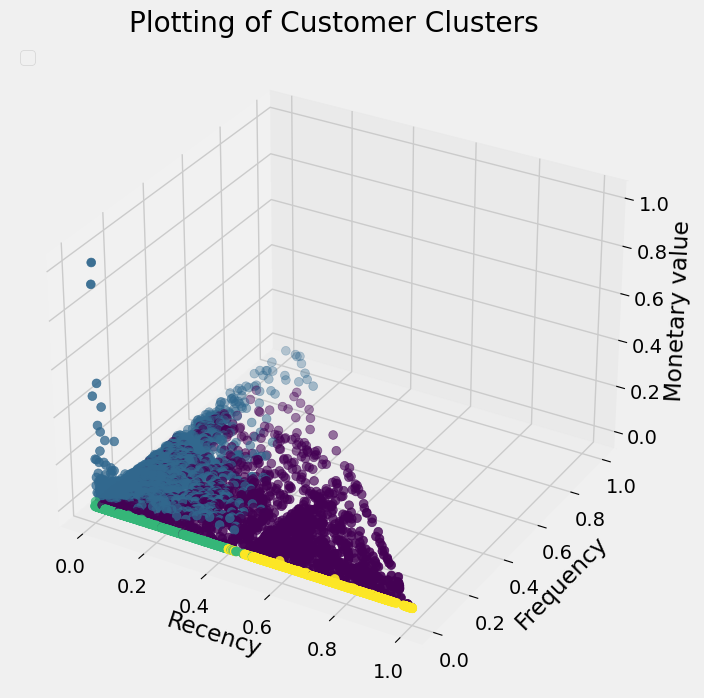

In [77]:
#Plotting the clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(X_input_df.recency,X_input_df.frequency, X_input_df.monetary, s=40, c=X_input_df["kmeans_cluster"], marker='o' )
ax.set_title("Plotting of Customer Clusters")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
ax.legend(loc=2)
plt.show()

In [78]:
import plotly
import plotly.express as plotly_express
figure = plotly_express.scatter_3d(allyears_prepped_withcluster,
                 x='recency', y='frequency',z='monetary', color="cluster", hover_data={'index': ( allyears_prepped_withcluster.index)} ,
                 title="Plotting of Customer Clusters")
 
# Update the layout using update_layout 
# function to show the legend
figure.update_layout(showlegend=True)
 
figure.show()

### As clearly seen above, the 4 clusters represent:

#### Cluster 0 (2071 customers) :  haven't purchased for a long time (poor recency score), but for the time they were customers, had high / low frequency which implies they have been repeat customers at some point (recall that frequency will be 0 if its only single transcation ), however they did not add much to the monetary value except in some cases

#### Cluster 1 (2309 customers) : Preferred customers who are (repeat customers +  recent purchasers) or (add monetary value)

#### Cluster 2 (642 customers) : Good Prospects since they have recntly purchased (even though once) so we can strategically convert them into returning customers

#### Cluster 3 (836 customers) : Lost customers since they only had single transaction and did not return to purchase recently (implies that monetary value is low)

### ------------------------------------------------------------------------------------------------------

### 5.0 🔰Tinkering/ exploring the Description ( stock code cannot help us narrow down to correlations/ patterns) ; It might help for recommendation / framing marketing strategy by augmenting dataset & enabling more clusters ?

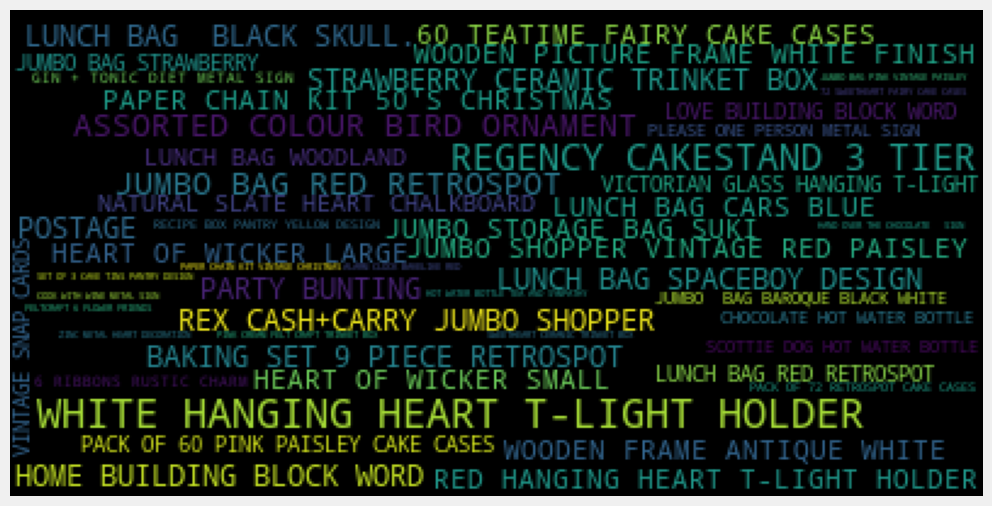

In [79]:
from wordcloud import WordCloud, STOPWORDS
item_description = allyears_cleaned['Description'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(item_description)
plt.figure(figsize=(15,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [80]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import pos_tag
import gensim
import gensim.downloader as gensim_api
## for bert
import transformers

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/royscrolls/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/royscrolls/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/royscrolls/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/royscrolls/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [81]:
allyears_cleaned['Description'].unique

<bound method Series.unique of 0         15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                          PINK CHERRY LIGHTS
2                         WHITE CHERRY LIGHTS
3                RECORD FRAME 7" SINGLE SIZE 
4              STRAWBERRY CERAMIC TRINKET BOX
                         ...                 
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
541909                                POSTAGE
Name: Description, Length: 797885, dtype: object>

In [82]:
##creating new df with text only
df_description=allyears_cleaned[['Description']]
df_description.shape

(797885, 1)

In [83]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [132]:
stopwords_list = nltk.corpus.stopwords.words("english")
#stopwords_list

In [87]:
df_description["Description_m1"] = df_description["Description"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=stopwords_list))
df_description.head(10)

/var/folders/0t/56tw317j52n02zljvtt1yxg00000gn/T/ipykernel_50162/2531278886.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Description                      Description_m1
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS  15cm christmas glass ball 20 light
1                   PINK CHERRY LIGHTS                   pink cherry light
2                  WHITE CHERRY LIGHTS                  white cherry light
3         RECORD FRAME 7" SINGLE SIZE           record frame 7 single size
4       STRAWBERRY CERAMIC TRINKET BOX      strawberry ceramic trinket box
5           PINK DOUGHNUT TRINKET POT            pink doughnut trinket pot
6                  SAVE THE PLANET MUG                     save planet mug
7   FANCY FONT HOME SWEET HOME DOORMAT  fancy font home sweet home doormat
8                            CAT BOWL                             cat bowl
9       DOG BOWL , CHASING BALL DESIGN        dog bowl chasing ball design

In [88]:
df_description['POS Tagged Text'] = df_description['Description_m1'].apply(lambda item:item.strip().split()).apply(pos_tag)
df_description['nouns_text'] = df_description['POS Tagged Text'].apply(lambda item:[w for w,t in item if t=='NN'])
print(df_description['nouns_text'])

/var/folders/0t/56tw317j52n02zljvtt1yxg00000gn/T/ipykernel_50162/3641348100.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0          [glass, ball, light]
1         [pink, cherry, light]
2               [cherry, light]
3         [record, frame, size]
4                [trinket, box]
                  ...          
541905                       []
541906                       []
541907         [circus, parade]
541908       [piece, retrospot]
541909                [postage]
Name: nouns_text, Length: 797885, dtype: object


/var/folders/0t/56tw317j52n02zljvtt1yxg00000gn/T/ipykernel_50162/3641348100.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
###this is Word Embedding Model that detects similar words
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [92]:
# We can use to create a dictionary of relevant product classes
df_description.head(10)

Description                      Description_m1  \
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS  15cm christmas glass ball 20 light   
1                   PINK CHERRY LIGHTS                   pink cherry light   
2                  WHITE CHERRY LIGHTS                  white cherry light   
3         RECORD FRAME 7" SINGLE SIZE           record frame 7 single size   
4       STRAWBERRY CERAMIC TRINKET BOX      strawberry ceramic trinket box   
5           PINK DOUGHNUT TRINKET POT            pink doughnut trinket pot   
6                  SAVE THE PLANET MUG                     save planet mug   
7   FANCY FONT HOME SWEET HOME DOORMAT  fancy font home sweet home doormat   
8                            CAT BOWL                             cat bowl   
9       DOG BOWL , CHASING BALL DESIGN        dog bowl chasing ball design   

                                     POS Tagged Text  \
0  [(15cm, CD), (christmas, JJ), (glass, NN), (ba...   
1            [(pink, NN), (cherry, NN), (light, NN)]   
2           [(white, JJ), (cherry, NN), (light, NN)]   
3  [(record, NN), (frame, NN), (7, CD), (single, ...   
4  [(strawberry, JJ), (ceramic, JJ), (trinket, NN...   
5  [(pink, NN), (doughnut, NN), (trinket, NN), (p...   
6              [(save, JJ), (planet, NN), (mug, NN)]   
7  [(fancy, JJ), (font, NN), (home, NN), (sweet, ...   
8                            [(cat, NN), (bowl, NN)]   
9  [(dog, NN), (bowl, NN), (chasing, VBG), (ball,...   

                           nouns_text  
0                [glass, ball, light]  
1               [pink, cherry, light]  
2                     [cherry, light]  
3               [record, frame, size]  
4                      [trinket, box]  
5      [pink, doughnut, trinket, pot]  
6                       [planet, mug]  
7  [font, home, sweet, home, doormat]  
8                         [cat, bowl]  
9           [dog, bowl, ball, design]

In [93]:
df_description2=df_description.copy()
a = pd.DataFrame([y for x in df_description2['nouns_text'] for y in x]).value_counts()
print(a.shape)
print(a.head(20))

(1711,)
bag           70136
heart         67830
box           44066
design        43520
vintage       42029
retrospot     41792
cake          32372
metal         30971
christmas     29739
pink          28528
holder        28252
sign          26935
lunch         24654
pack          23548
paper         23273
card          21242
tin           20711
glass         19898
case          18954
decoration    18703
dtype: int64


### Out of 542k unique product descriptions there are 1711 nouns that cuuld be used for categorization

### -------------------------------------------------------------------------------------------------------

### 6.0 🔰 Time Series Modeling

In [94]:
#timeseries modeling
import xgboost as xgb
from sklearn.metrics import  mean_squared_error
color_pal=sns.color_palette

In [95]:
#allyears_cleaned['Customer ID'].nunique() #5942 customer ids
allyears_prepped_withcluster.shape #5858 of them clustered

(5858, 10)

In [96]:
allyears_cleaned

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price Customer ID         Country  Total_Price  \
0      2009-12-01 07:45:00   6.95     13085.0  United Kingdom        83.40   
1      2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.00   
2      2009-12-01 07:45:00   6.75     13085.0  United Kingdom        81.00   
3      2009-12-01 07:45:00   2.10     13085.0  United Kingdom       100.80   
4      2009-12-01 07:45:00   1.25     13085.0  United Kingdom        30.00   
...                    ...    ...         ...             ...          ...   
541905 2011-12-09 12:50:00   2.10     12680.0          France        12.60   
541906 2011-12-09 12:50:00   4.15     12680.0          France        16.60   
541907 2011-12-09 12:50:00   4.15     12680.0          France        16.60   
541908 2011-12-09 12:50:00   4.95     12680.0          France        14.85   
541909 2011-12-09 12:50:00  18.00     12680.0          France        18.00   

       InvoiceDate_only  
0            2009-12-01  
1            2009-12-01  
2            2009-12-01  
3            2009-12-01  
4            2009-12-01  
...                 ...  
541905       2011-12-09  
541906       2011-12-09  
541907       2011-12-09  
541908       2011-12-09  
541909       2011-12-09  

[797885 rows x 10 columns]

In [97]:
allyears_prepped_withcluster=allyears_prepped_withcluster.reset_index()
allyears_prepped_withcluster.head()

Customer ID  unique_invoices  unique_stockcode  unique_transactiondates  \
0      12347.0                8               126                        8   
1      12348.0                5                25                        5   
2      12349.0                5               139                        5   
3      12350.0                1                17                        1   
4      12351.0                1                21                        1   

   monetary  days_between  recency  frequency  repeat_customer  RFM_score  \
0   4921.53           402        3      50.25                1          3   
1   2019.40           363       76      72.60                1          5   
2   4404.54           717       19     143.40                1          4   
3    334.40             0      311       0.00                0          7   
4    300.93             0      376       0.00                0          8   

   cluster  
0        1  
1        1  
2        1  
3        2  
4        3

#### Best way would be to truncate the allyears_cleaned df to only the customers we clustered & then split & create 4 dataframes for 4 clusters
#### Joined dataframe

In [98]:
df_merged = pd.merge(allyears_cleaned,
                    allyears_prepped_withcluster[['Customer ID','cluster']],
                    left_on='Customer ID',right_on='Customer ID',how='inner')
df_merged.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price Customer ID         Country  Total_Price  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom         83.4   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         81.0   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom         81.0   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom        100.8   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom         30.0   

  InvoiceDate_only  cluster  
0       2009-12-01        1  
1       2009-12-01        1  
2       2009-12-01        1  
3       2009-12-01        1  
4       2009-12-01        1

In [99]:
#Confirming cluster counts aftre having new dataset
print(df_merged.groupby('cluster').agg({'Customer ID': 'nunique'}))
print(df_merged.groupby('cluster').size())
print(df_merged.shape)

         Customer ID
cluster             
0               2071
1               2309
2                642
3                836
cluster
0    133706
1    631741
2     14276
3     17672
dtype: int64
(797395, 11)


In [100]:
df_C0=df_merged[df_merged['cluster']==0]
df_C1=df_merged[df_merged['cluster']==1]
df_C2=df_merged[df_merged['cluster']==2]
df_C3=df_merged[df_merged['cluster']==3]
print(df_C0.shape,df_C1.shape,df_C2.shape,df_C3.shape)

(133706, 11) (631741, 11) (14276, 11) (17672, 11)


### 6.1 Modeling for df_C0 first...

In [101]:
def make_timeseries(df):
    df=df.groupby(['InvoiceDate_only']).agg(sum_price=('Total_Price','sum'))
    return df

def make_train(df):
    train=df.loc[df.index < '11-09-2011']
    return train

def make_test(df):
    test=df.loc[df.index >= '11-09-2011']
    return test

def visualize_train_test(train,test):
    fig,ax=plt.subplots(figsize=(15,6))
    train.plot(ax=ax, label='Training set')
    test.plot(ax=ax, label='Test set')
    ax.axvline('11-09-2011', color='black',ls='--')
    ax.legend (['Training Set','Test Set'])
    plt.show()
    
def create_features_lags_rolling(df):
    """
    Create time series dataset
    """
    df=df.copy()
    df['month']=df.index.month
    df['year']=df.index.year
    df['quarter']=df.index.quarter
    df['dayofyear']=df.index.dayofyear
    df['dayofweek']=df.index.dayofweek
    df['target_lag_7'] = df['sum_price'].shift(7)
    df['target_lag_1'] = df['sum_price'].shift(1)
    df['target_rollingmean_7'] = df['sum_price'].rolling(window = 7).mean()
    df['target_rollingmean_2'] = df['sum_price'].rolling(window = 2).mean()
    df['target_rollingmean_14'] = df['sum_price'].rolling(window = 14).mean()
    return df

In [102]:
df_C0=make_timeseries(df_C0)
train=make_train(df_C0)
test=make_test(df_C0)

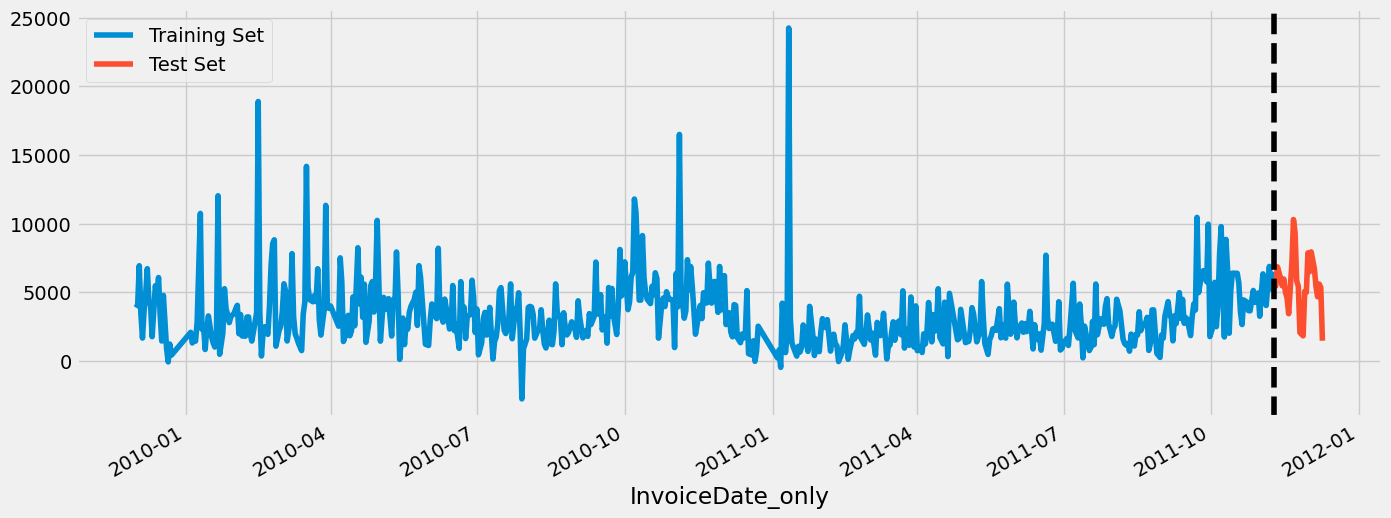

In [103]:
visualize_train_test(train, test)

Text(0.5, 1.0, 'Spend by Month of C0')

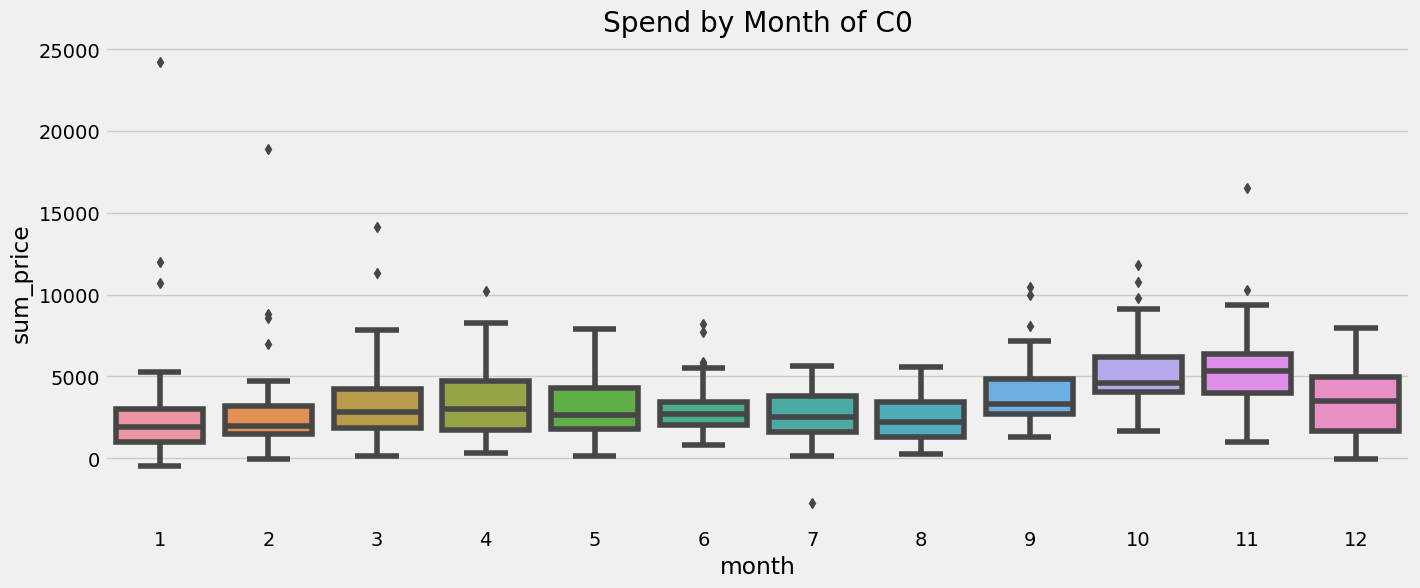

In [104]:
df_C0=create_features_lags_rolling(df_C0)
#to get distributions across features
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df_C0,x='month',y='sum_price')
ax.set_title('Spend by Month of C0')

Text(0.5, 1.0, 'Spend by Day of Week of C0')

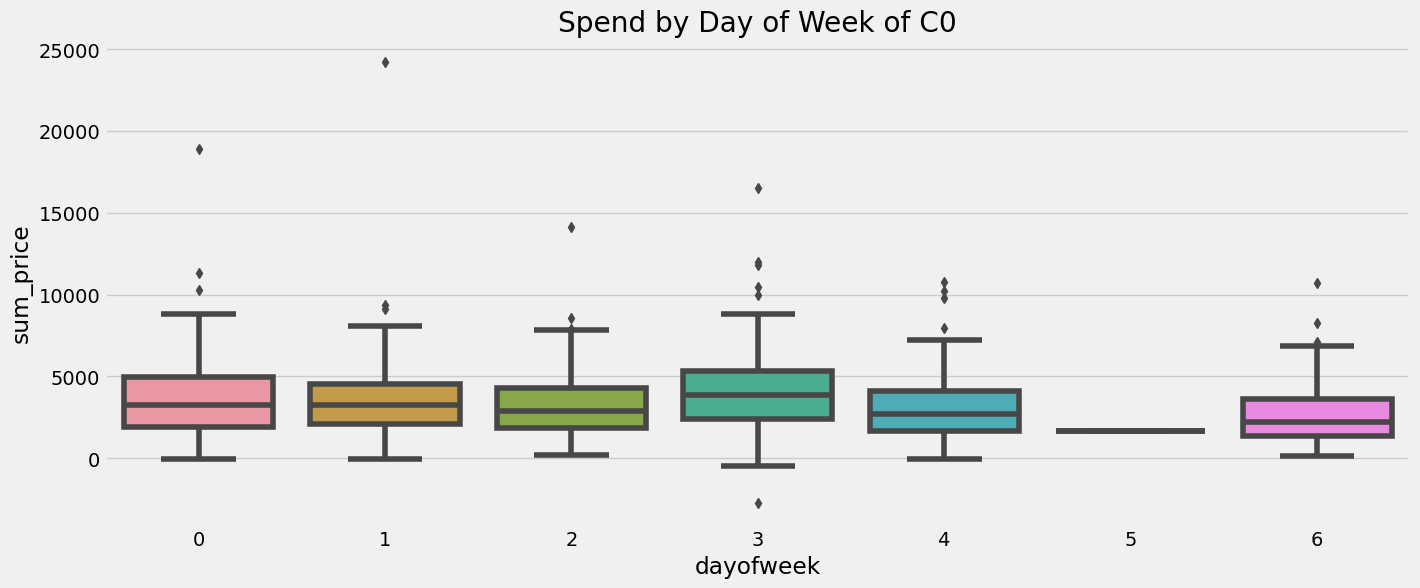

In [105]:
#to get distributions across features
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df_C0,x='dayofweek',y='sum_price')
ax.set_title('Spend by Day of Week of C0')

In [106]:
train=create_features_lags_rolling(train)
test=create_features_lags_rolling(test)
print(train.shape, test.shape)
X=['month','year','quarter','dayofyear','dayofweek','target_lag_7','target_lag_1','target_rollingmean_7','target_rollingmean_2','target_rollingmean_14'] #predictors
Y='sum_price'   #target var

(577, 11) (27, 11)


### 6.2 XGB Method

In [107]:
x_train=train[X]
y_train=train[Y]
x_test=test[X]
y_test=test[Y]
m1=xgb.XGBRegressor(n_estimators=500,early_stopping_rounds=80)
m1.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)]
       ,verbose=5)

[0]	validation_0-rmse:2999.54988	validation_1-rmse:4180.00615
[5]	validation_0-rmse:712.74856	validation_1-rmse:1022.88650
[10]	validation_0-rmse:255.33032	validation_1-rmse:645.62844
[15]	validation_0-rmse:131.89892	validation_1-rmse:620.11020
[20]	validation_0-rmse:89.65046	validation_1-rmse:609.03937
[25]	validation_0-rmse:71.78174	validation_1-rmse:605.21251
[30]	validation_0-rmse:63.72067	validation_1-rmse:605.73824
[35]	validation_0-rmse:53.10893	validation_1-rmse:602.70148
[40]	validation_0-rmse:44.89865	validation_1-rmse:600.31667
[45]	validation_0-rmse:37.04335	validation_1-rmse:599.02792
[50]	validation_0-rmse:28.88513	validation_1-rmse:599.86546
[55]	validation_0-rmse:23.28884	validation_1-rmse:599.78436
[60]	validation_0-rmse:18.55629	validation_1-rmse:600.14520
[65]	validation_0-rmse:15.44500	validation_1-rmse:599.23984
[70]	validation_0-rmse:12.61566	validation_1-rmse:599.49660
[75]	validation_0-rmse:10.99171	validation_1-rmse:599.66238
[80]	validation_0-rmse:8.98835	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=80,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [108]:
m1.feature_importances_

array([0.00098212, 0.00139793, 0.        , 0.0087133 , 0.00724909,
       0.00278142, 0.20528375, 0.0015273 , 0.7711275 , 0.00093754],
      dtype=float32)

In [109]:
def prepare_prediction_df(df,m):
    test['prediction']= m.predict(x_test)
    df_withpred=df.merge(test[['prediction']],how='left',left_index=True, right_index=True)
    return df_withpred

def plot_predictions(df):
    ax=df[['sum_price']].plot(figsize=(15,6))
    df['prediction'].plot(ax=ax)
    plt.legend(['True data','Predictions'])
    plt.show()
    
def print_rmse(test):
    score=np.sqrt(mean_squared_error(test['sum_price'],test['prediction']))
    print(f'RMSE score : {score:0.2f}')
    
### how different are predictions from actuals
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE from y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [110]:
df_C0_withpred=prepare_prediction_df(df_C0,m1)

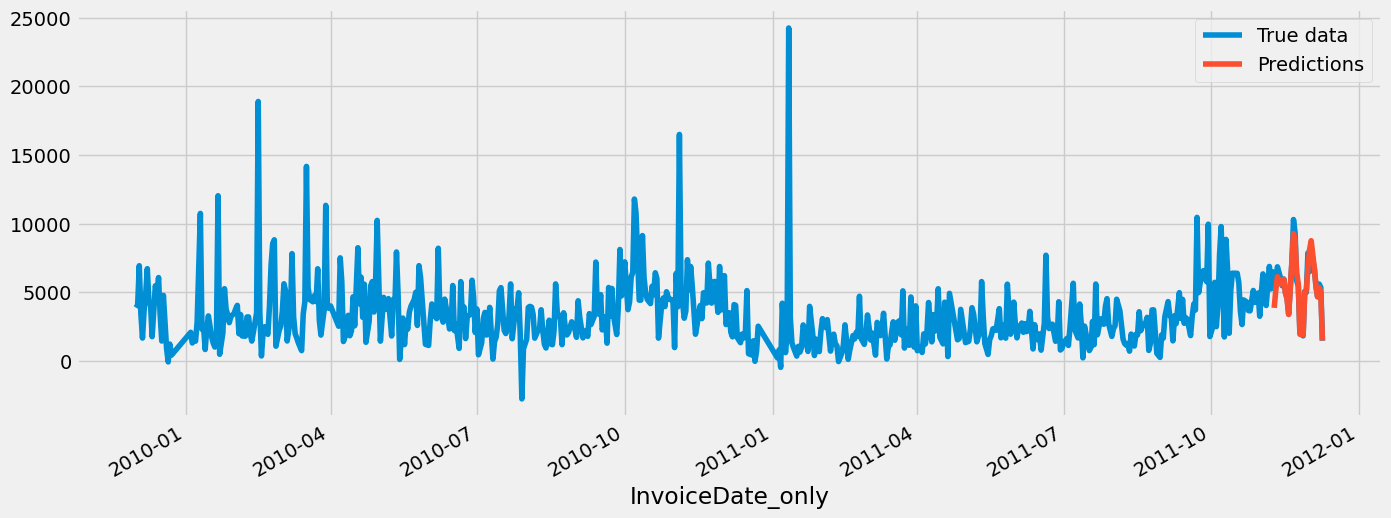

In [111]:
plot_predictions(df_C0_withpred)

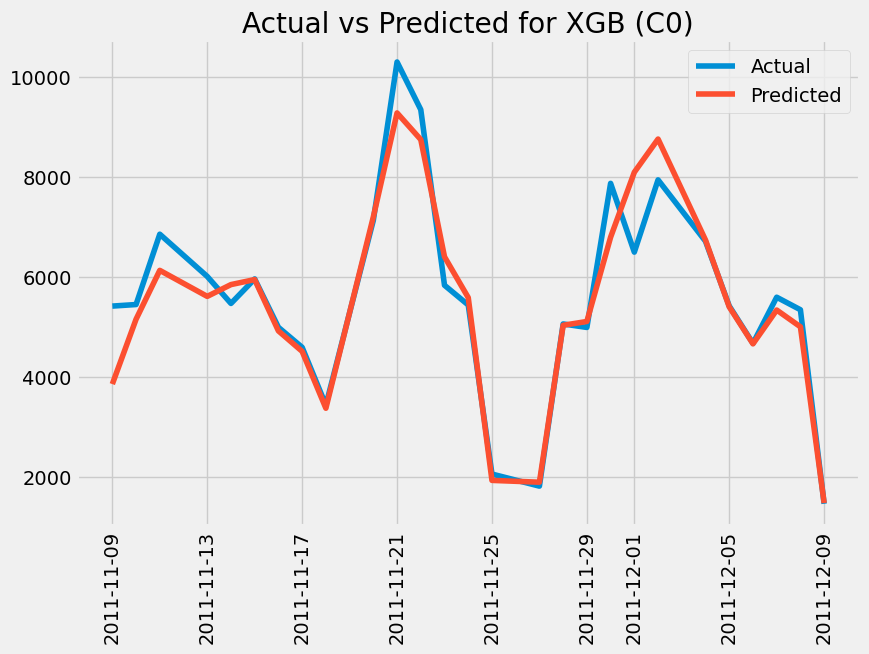

In [112]:
# plot expected vs actual
test_withpred=prepare_prediction_df(x_test,m1)
from matplotlib import pyplot
pyplot.plot(y_test, label='Actual')
pyplot.plot(test_withpred['prediction'], label='Predicted')
pyplot.title('Actual vs Predicted for XGB (C0)')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()

In [113]:
print_rmse(test)

RMSE score : 598.84


In [114]:
mean_absolute_percentage_error(y_true=test['sum_price'],y_pred=test['prediction'])

6.211402872511011

### Trying for next cluster C1

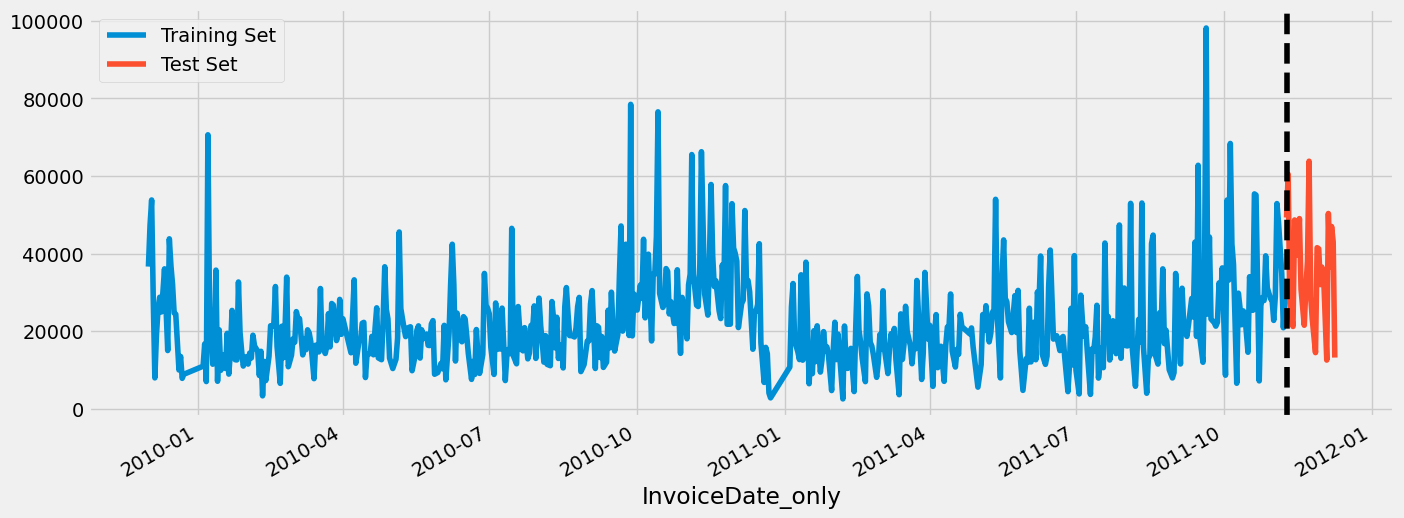

In [115]:
df_C1=make_timeseries(df_C1)
train=make_train(df_C1)
test=make_test(df_C1)
visualize_train_test(train, test)

Text(0.5, 1.0, 'Spend by Month of C1')

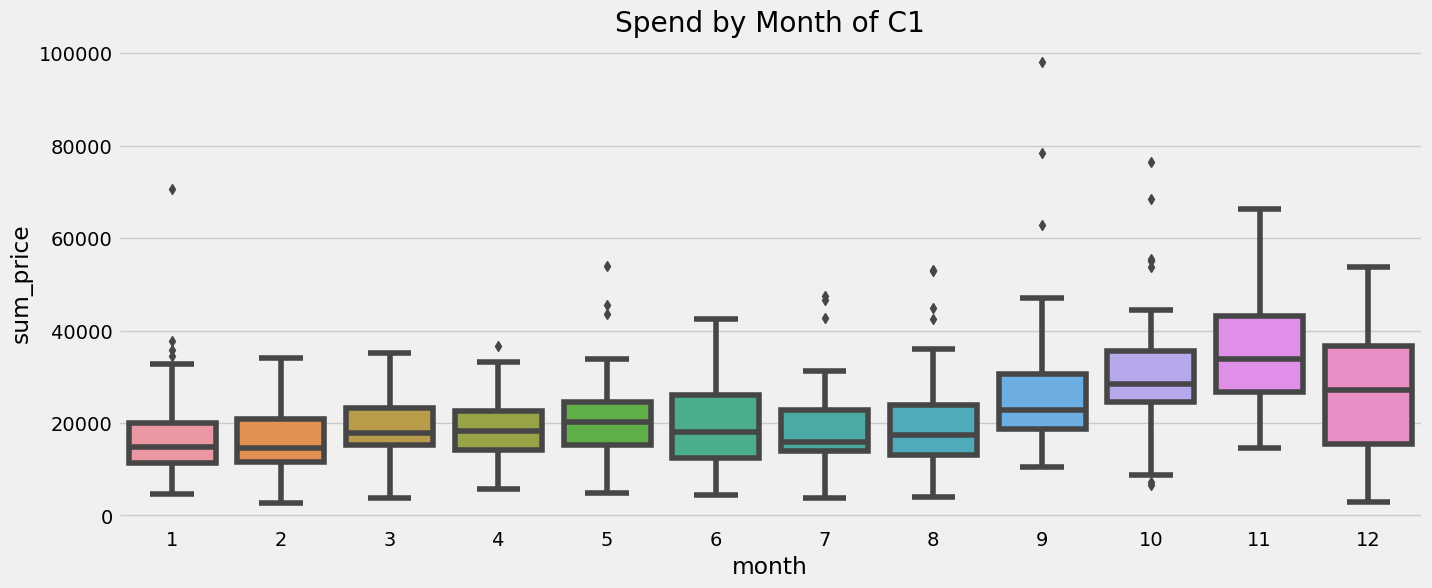

In [116]:
df_C1=create_features_lags_rolling(df_C1)
#to get distributions across features
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df_C1,x='month',y='sum_price')
ax.set_title('Spend by Month of C1')

Text(0.5, 1.0, 'Spend by Day of Week for C1')

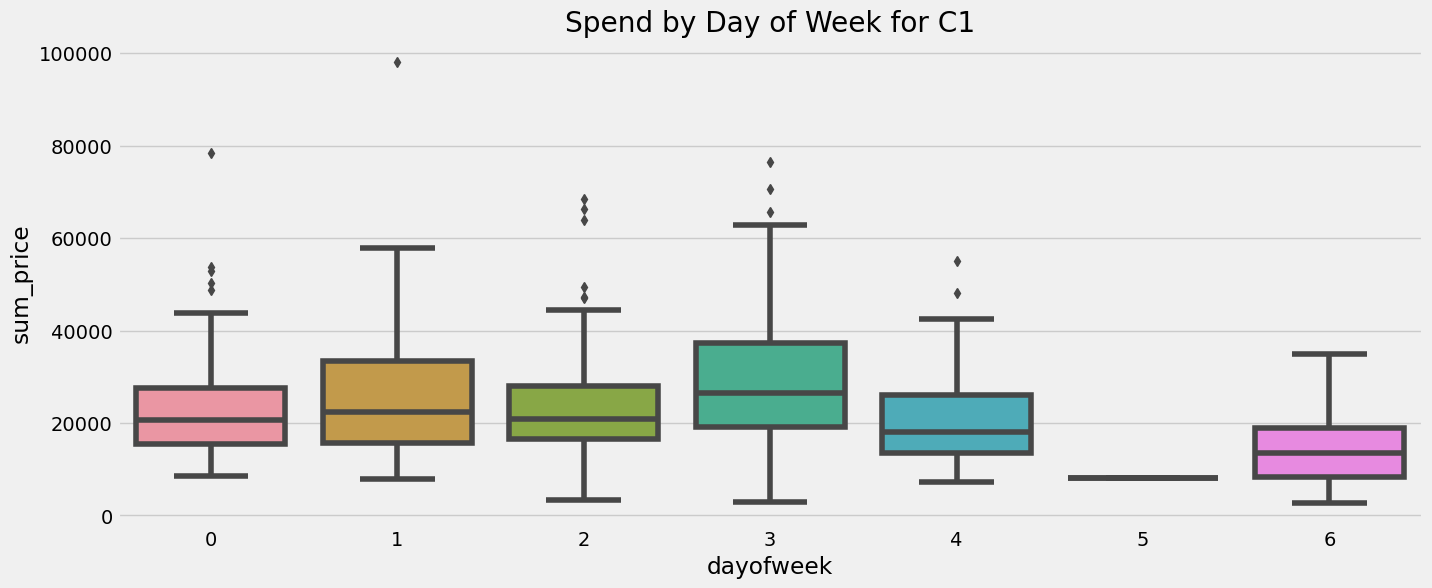

In [117]:
#to get distributions across features
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df_C1,x='dayofweek',y='sum_price')
ax.set_title('Spend by Day of Week for C1')

In [118]:
train=create_features_lags_rolling(train)
test=create_features_lags_rolling(test)
X=['month','year','quarter','dayofyear','dayofweek','target_lag_7','target_lag_1','target_rollingmean_7','target_rollingmean_2','target_rollingmean_14'] #predictors
Y='sum_price'   #target var

In [119]:
x_train=train[X]
y_train=train[Y]
x_test=test[X]
y_test=test[Y]
m1=xgb.XGBRegressor(n_estimators=500,early_stopping_rounds=200)
m1.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)]
       ,verbose=5)

[0]	validation_0-rmse:18260.49951	validation_1-rmse:27759.38439
[5]	validation_0-rmse:3985.03825	validation_1-rmse:6648.77306
[10]	validation_0-rmse:1240.26738	validation_1-rmse:3768.99983
[15]	validation_0-rmse:646.27437	validation_1-rmse:3526.08138
[20]	validation_0-rmse:478.99539	validation_1-rmse:3469.62117
[25]	validation_0-rmse:394.28770	validation_1-rmse:3478.93849
[30]	validation_0-rmse:352.31976	validation_1-rmse:3465.26341
[35]	validation_0-rmse:298.39733	validation_1-rmse:3456.05214
[40]	validation_0-rmse:254.70857	validation_1-rmse:3449.85176
[45]	validation_0-rmse:212.17376	validation_1-rmse:3448.59461
[50]	validation_0-rmse:163.09086	validation_1-rmse:3450.47264
[55]	validation_0-rmse:141.80356	validation_1-rmse:3435.92641
[60]	validation_0-rmse:119.61652	validation_1-rmse:3434.53023
[65]	validation_0-rmse:95.83794	validation_1-rmse:3434.12312
[70]	validation_0-rmse:77.67639	validation_1-rmse:3430.75958
[75]	validation_0-rmse:61.90665	validation_1-rmse:3431.96828
[80]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=200,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

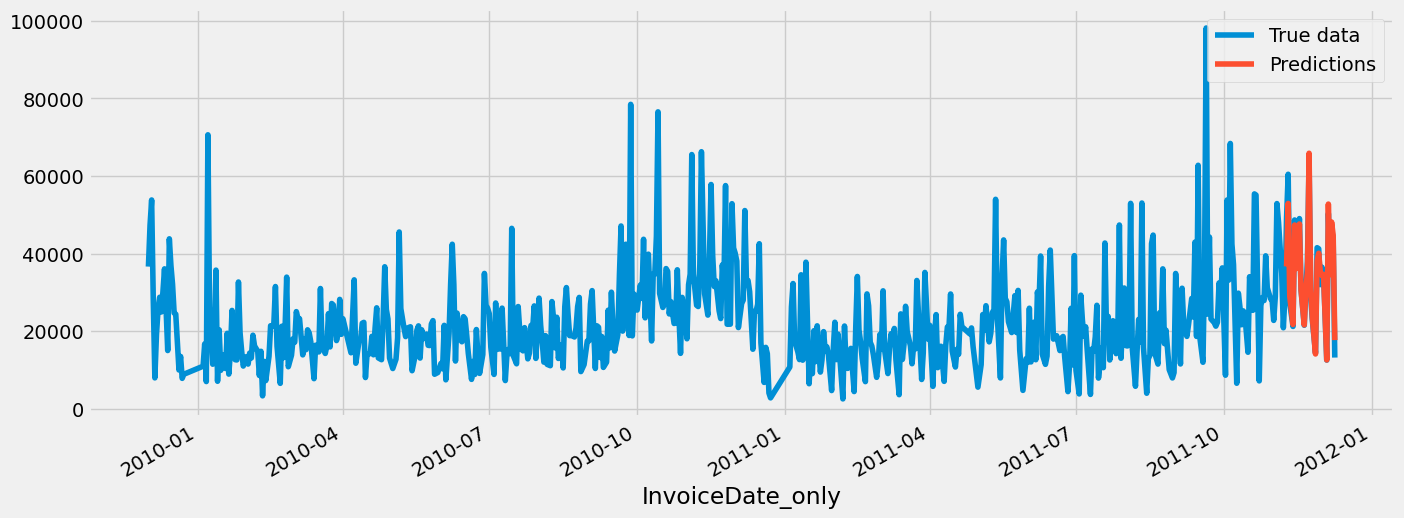

In [120]:
df_C1_withpred=prepare_prediction_df(df_C1,m1)
plot_predictions(df_C1_withpred)

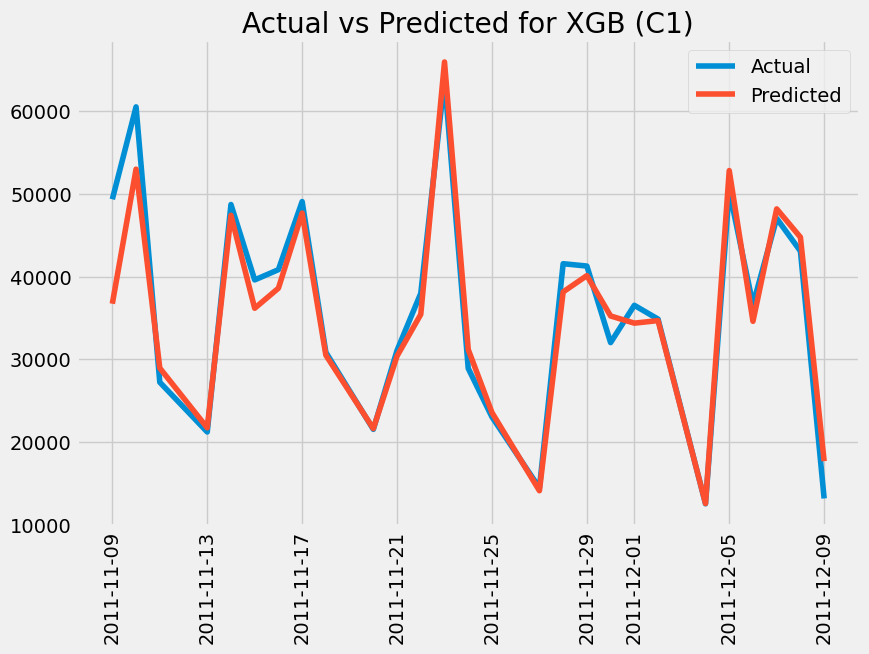

In [121]:
# plot expected vs actual
test_withpred=prepare_prediction_df(x_test,m1)
from matplotlib import pyplot
pyplot.plot(y_test, label='Actual')
pyplot.plot(test_withpred['prediction'], label='Predicted')
pyplot.title('Actual vs Predicted for XGB (C1)')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()

In [122]:
print_rmse(test)

RMSE score : 3430.71


In [123]:

mean_absolute_percentage_error(y_true=test['sum_price'],y_pred=test['prediction'])

6.324256396814783

 ### as we can see , XGB gives great MAPE for both Clusters 0 & 1 (6% variability) which forms the bulk of data and the difference happened when we included rolling mean of last 2 days as a predictor variable. Sudden improvement of results may indicate overfitting 

### for the last 2 clusters

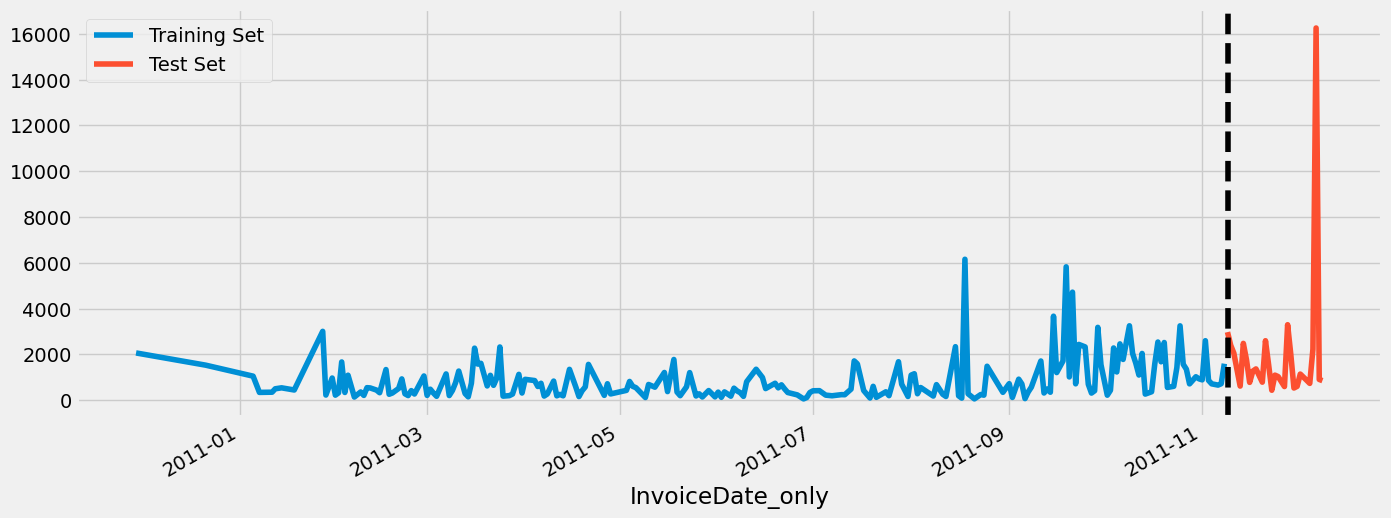

In [124]:
df_C2=make_timeseries(df_C2)
train=make_train(df_C2)
test=make_test(df_C2)
visualize_train_test(train, test)

Text(0.5, 1.0, 'Spend by Month of C2')

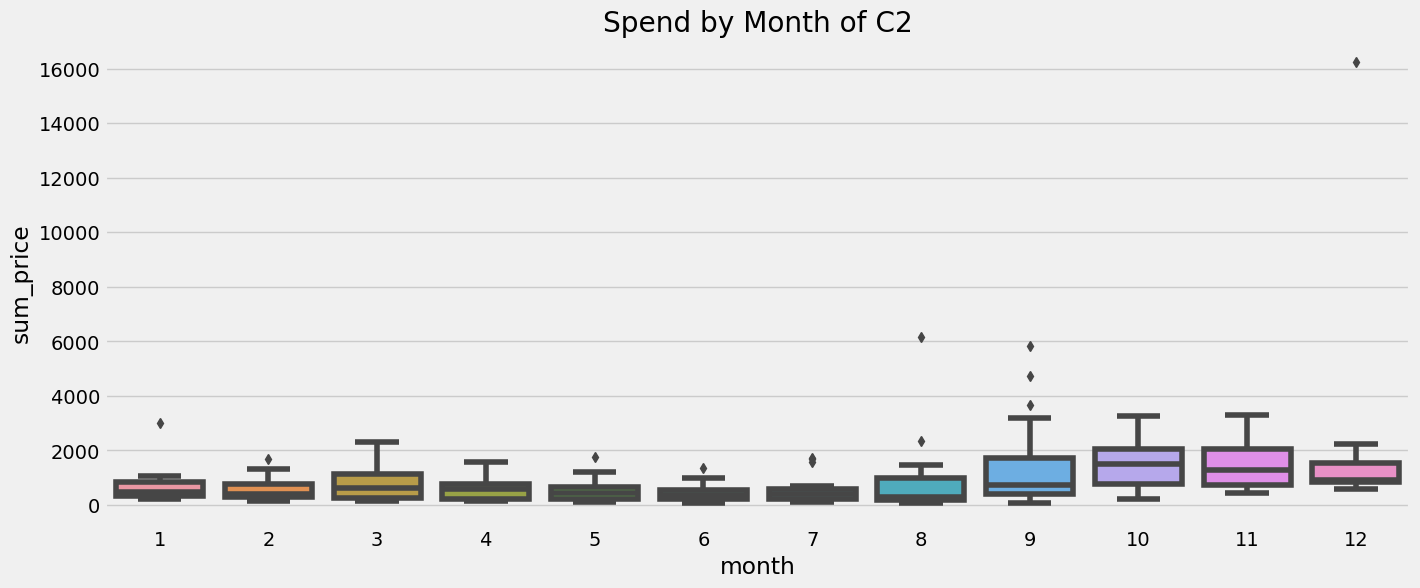

In [125]:
df_C2=create_features_lags_rolling(df_C2)
#to get distributions across features by month
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df_C2,x='month',y='sum_price')
ax.set_title('Spend by Month of C2')

Text(0.5, 1.0, 'Spend by Day of Week for C2')

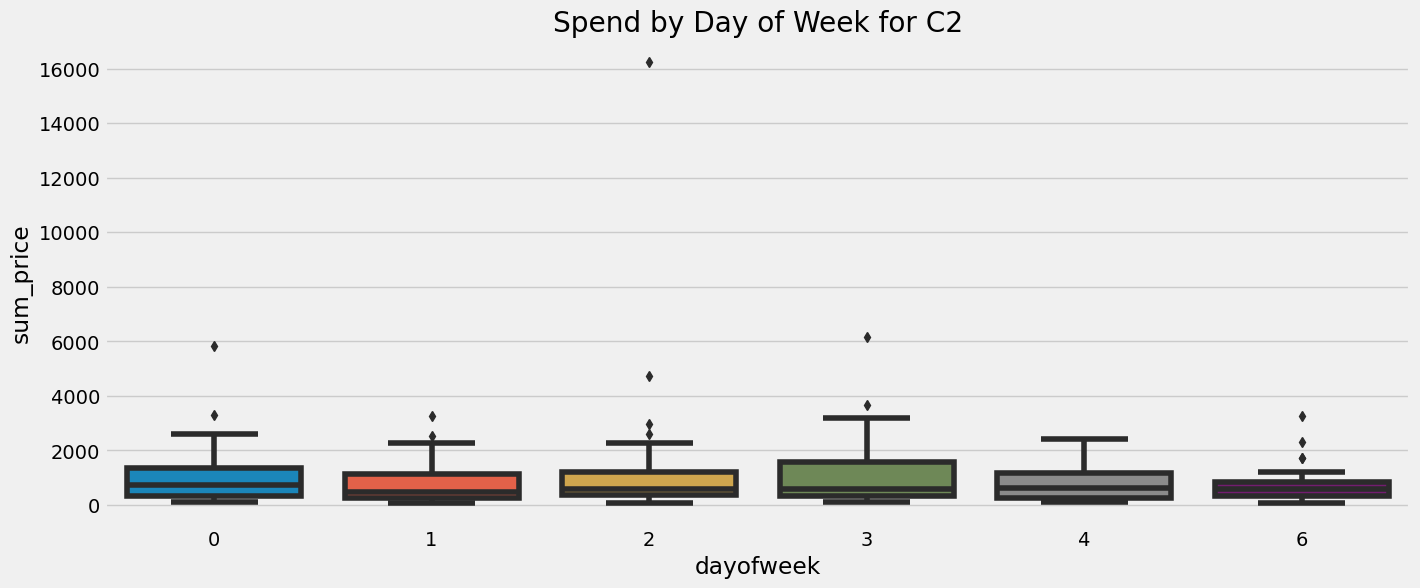

In [126]:
#to get distributions across features by day
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data=df_C2,x='dayofweek',y='sum_price')
ax.set_title('Spend by Day of Week for C2')

In [127]:
train=create_features_lags_rolling(train)
test=create_features_lags_rolling(test)
X=['month','year','quarter','dayofyear','dayofweek','target_lag_7','target_lag_1','target_rollingmean_7','target_rollingmean_2','target_rollingmean_14'] #predictors
Y='sum_price'   #target var

In [128]:
x_train=train[X]
y_train=train[Y]
x_test=test[X]
y_test=test[Y]
m1=xgb.XGBRegressor(n_estimators=500,early_stopping_rounds=200)
m1.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)]
       ,verbose=5)

[0]	validation_0-rmse:935.44241	validation_1-rmse:3270.74942
[5]	validation_0-rmse:247.62982	validation_1-rmse:2853.40530
[10]	validation_0-rmse:78.35130	validation_1-rmse:2712.70526
[15]	validation_0-rmse:32.39635	validation_1-rmse:2637.81375
[20]	validation_0-rmse:16.67204	validation_1-rmse:2633.84788
[25]	validation_0-rmse:10.71506	validation_1-rmse:2633.38435
[30]	validation_0-rmse:7.32661	validation_1-rmse:2632.59773
[35]	validation_0-rmse:5.02344	validation_1-rmse:2632.43347
[40]	validation_0-rmse:3.68918	validation_1-rmse:2632.27526
[45]	validation_0-rmse:2.49896	validation_1-rmse:2632.07040
[50]	validation_0-rmse:1.91396	validation_1-rmse:2631.98339
[55]	validation_0-rmse:1.50431	validation_1-rmse:2632.03688
[60]	validation_0-rmse:1.10732	validation_1-rmse:2632.06525
[65]	validation_0-rmse:0.89556	validation_1-rmse:2632.03756
[70]	validation_0-rmse:0.60062	validation_1-rmse:2632.02697
[75]	validation_0-rmse:0.45375	validation_1-rmse:2632.01609
[80]	validation_0-rmse:0.33236	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=200,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

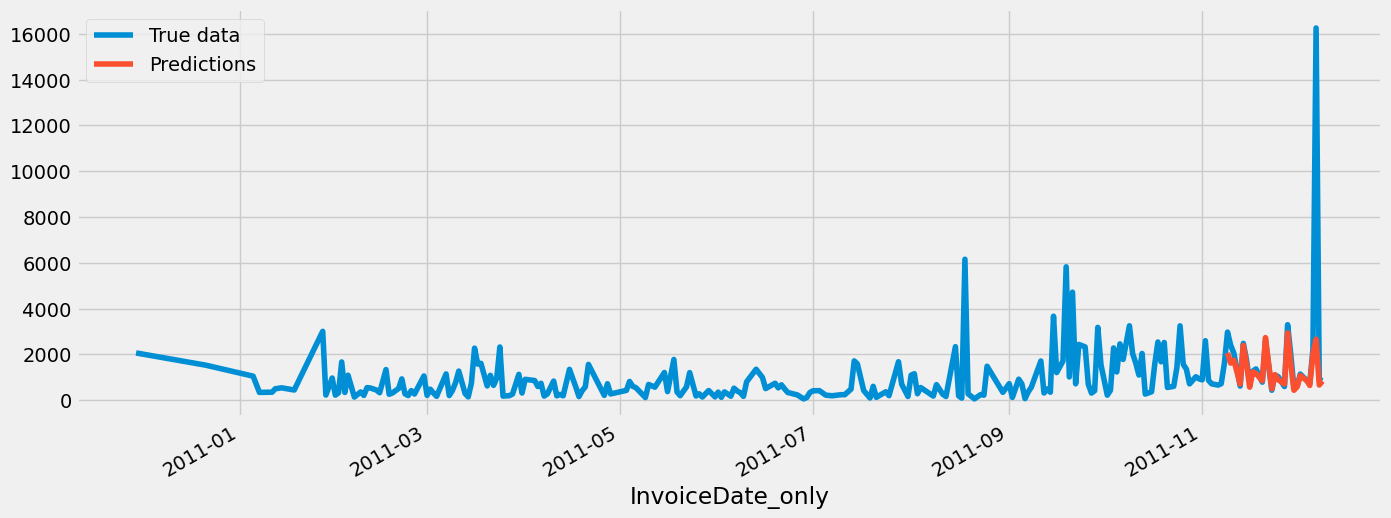

In [129]:
df_C2_withpred=prepare_prediction_df(df_C2,m1)
plot_predictions(df_C2_withpred)

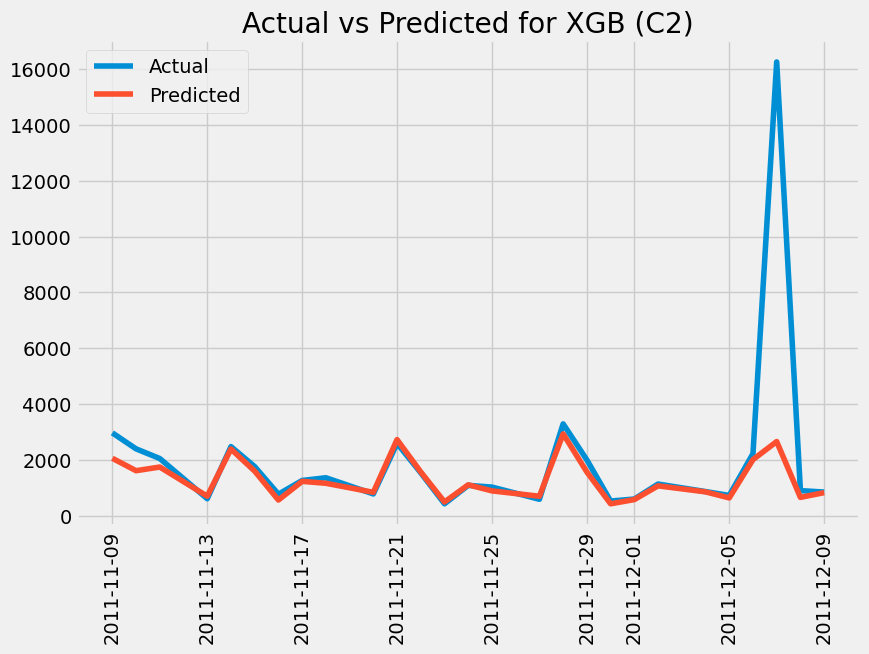

In [130]:
# plot expected vs actual
test_withpred=prepare_prediction_df(x_test,m1)
from matplotlib import pyplot
pyplot.plot(y_test, label='Actual')
pyplot.plot(test_withpred['prediction'], label='Predicted')
pyplot.title('Actual vs Predicted for XGB (C2)')
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()

In [131]:
print_rmse(test)

print("MAPE is",mean_absolute_percentage_error(y_true=test['sum_price'],y_pred=test['prediction']))

RMSE score : 2631.98
MAPE is 15.127956624413022
